<a href="https://colab.research.google.com/github/adihatake/garbage_classifier/blob/master/Adrian's_Cheat_Detect_NLP_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adrian Balajadia's Cheat Detect Source Code**

# Import essential modules and libraries

In my program, notable software used were:

- Natural Language Processing Toolkit (NLTK)
- Gensim
- Matplotlib
- Pandas
- Numpy
- Scikit-learn

In [ ]:
#import the dependencies
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('tagsets')

import math
import builtins 
import pandas as pd
import numpy as np
import re, string, unicodedata
!pip install contractions
import contractions
import inflect
import string  
import sklearn
import collections
import re
import gensim
import operator
import itertools
import heapq
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import string  
from heapq import nsmallest, nlargest
from collections import Counter

from operator import sub

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from gensim import corpora, models
from gensim.models import Word2Vec
import gensim.downloader as api
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from gensim.models import HdpModel, CoherenceModel

from nltk import pos_tag, pos_tag_sents
from nltk import edit_distance
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import wordnet, stopwords
from pprint import pprint
%matplotlib inline


Doc_tokens = {}

Function_Words = ['the', 'and', 'a', 'of', 'to', 'in', 'that', 'with', 'as', 'it',
'for', 'but', 'at', 'on', 'this', 'all', 'by', 
'which', 'they', 'so', 'from', 'no', 'or', 'one', 
'what', 'if', 'an', 'would', 'when', 'will']

Accused = {}

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# First Layer 

The following is a section of the code from the "loop starts here" section that performs the Delta Method.

I burrowed code from this source: 

François Dominic Laramée, "Introduction to stylometry with Python," The Programming Historian 7 (2018), https://doi.org/10.46430/phen0078.
```
for every_student in Names:
  print("NEW ITERATION SELECTING ", every_student, " AS STUDENT A \n ------------------ \n", )
  Test = []

  Test_docNum = Names.index(every_student)
  Test.append(Data[Test_docNum])


  Suspects_Student_X = {}

  for docs in range(len(Data)):
      tokens = nltk.word_tokenize(Data[docs])

      # Filter out punctuation
      Doc_tokens[docs] = ([token for token in tokens
                                              if any(c.isalpha() for c in token)])

      # Get a distribution of token lengths
      token_lengths = [len(token) for token in Doc_tokens[docs]]



  for docs in range(len(Data)):
      Doc_tokens[docs] = (
          [tok.lower() for tok in Doc_tokens[docs]])

  # Combine every paper except our test case into a single corpus
  whole_corpus = []
  for docs in range(len(Data)):
      whole_corpus += Doc_tokens[docs]

  # Get a frequency distribution
  whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
  whole_corpus_freq_dist[ :10 ]

  features = [word for word,freq in whole_corpus_freq_dist]
  feature_freqs = {}

  for docs in range(len(Data)):
      # A dictionary for each candidate's features
      feature_freqs[docs] = {}

      # A helper value containing the number of tokens in the author's subcorpus
      overall = len(Doc_tokens[docs])

      # Calculate each feature's presence in the subcorpus
      for feature in features:
          presence = Doc_tokens[docs].count(feature)
          feature_freqs[docs][feature] = presence / overall


  # The data structure into which we will be storing the "corpus standard" statistics
  corpus_features = {}

  # For each feature...
  for feature in features:
      # Create a sub-dictionary that will contain the feature's mean
      # and standard deviation
      corpus_features[feature] = {}

      # Calculate the mean of the frequencies expressed in the subcorpora
      feature_average = 0
      for docs in range(len(Data)):
          feature_average += feature_freqs[docs][feature]
      feature_average /= len(Data)
      corpus_features[feature]["Mean"] = feature_average

      # Calculate the standard deviation using the basic formula for a sample
      feature_stdev = 0
      for docs in range(len(Data)):
          diff = feature_freqs[docs][feature] - corpus_features[feature]["Mean"]
          feature_stdev += diff*diff
      feature_stdev /= (len(Data) - 1)
      feature_stdev = math.sqrt(feature_stdev)
      corpus_features[feature]["StdDev"] = feature_stdev



  feature_zscores = {}
  for docs in range(len(Data)):
      feature_zscores[docs] = {}
      for feature in features:

          # Z-score definition = (value - mean) / stddev
          # We use intermediate variables to make the code easier to read
          feature_val = feature_freqs[docs][feature]
          feature_mean = corpus_features[feature]["Mean"]
          feature_stdev = corpus_features[feature]["StdDev"]
          feature_zscores[docs][feature] = ((feature_val-feature_mean) /
                                              feature_stdev)
          

  # Tokenize the test case
  testcase_tokens = nltk.word_tokenize(Test[0])

  # Filter out punctuation and lowercase the tokens
  testcase_tokens = [token.lower() for token in testcase_tokens
                    if any(c.isalpha() for c in token)]


  # Calculate the test case's features
  overall = len(testcase_tokens)
  testcase_freqs = {}
  for feature in features:
      presence = testcase_tokens.count(feature)
      testcase_freqs[feature] = presence / overall

  # Calculate the test case's feature z-scores
  testcase_zscores = {}
  for feature in features:
      feature_val = testcase_freqs[feature]
      feature_mean = corpus_features[feature]["Mean"]
      feature_stdev = corpus_features[feature]["StdDev"]
      testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    #  print("Test case z-score for feature", feature, "is", testcase_zscores[feature])


  for docs in range(len(Data)):
      delta = 0
      for feature in features:
          delta += math.fabs((testcase_zscores[feature] -
                              feature_zscores[docs][feature]))
    
      delta /= len(features)
      print( "Delta score for candidate", docs, "is", delta, "\n \n \n \n")

      
      Suspects_Student_X[docs] = delta
```



# Define Preprocessing Functions
This included:

- Stop word removal (e.g. the, a, and)
- Removal of punctuation
- Removal of accents
- Lowercasing all words
- Removal of numbers
- Lemmatization: In this function, the program changes all terms to their base form in respect of what type of word it is.



Code in this cell was burrowed from here:
Mayo, Matthew. “Text Data Preprocessing: A Walkthrough in Python.” KDnuggets, 2018, www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html.  

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def lemmatize_adj(words):
    """Lemmatize verbs in list of tokenized adj"""
    lemmatizer = WordNetLemmatizer()
    lemmas_adj = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='a')
        lemmas_adj.append(lemma)
    return lemmas_adj  

def lemmatize_nouns(words):
    """Lemmatize verbs in list of tokenized adj"""
    lemmatizer = WordNetLemmatizer()
    lemmas_nouns = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='n')
        lemmas_nouns.append(lemma)
    return lemmas_nouns  

def lemmatize_adverbs(words):
    """Lemmatize verbs in list of tokenized adj"""
    lemmatizer = WordNetLemmatizer()
    lemmas_adverbs = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='r')
        lemmas_adverbs.append(lemma)
    return lemmas_adverbs  

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def preprocess(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    words = lemmatize_adj(words)
    words = lemmatize_adverbs(words)
    words = lemmatize_nouns(words)
    return words

# Second Layer


# Define Frequency Functions

In [ ]:
def POS_Freq(num):
 # print(Feature_Data[num])
  Most_common_trigrams = []
  TrigramPOS_dict = {}

  text = pos_tag(nltk.word_tokenize(Feature_Data[num]))
  POS_tags = [item[1] for item in text]
  output = list(nltk.trigrams(POS_tags))

  for trigrams in output:
    POS_freq = output.count(trigrams)

    if trigrams in TrigramPOS_dict:
      Value = TrigramPOS_dict.get(trigrams)
      Value = Value + 1
      TrigramPOS_dict[trigrams] = Value
      
    else: 
      TrigramPOS_dict[trigrams] = POS_freq

  Commons1 = Counter(TrigramPOS_dict)
  Commons2 = Commons1.most_common()

  Most_common_trigrams2 = [POS_trigrams[0] for POS_trigrams in Commons2]
  
  Most_common_trigrams.append(Most_common_trigrams2[0])
  Most_common_trigrams.append(Most_common_trigrams2[1])
  Most_common_trigrams.append(Most_common_trigrams2[2])
  Most_common_trigrams.append(Most_common_trigrams2[3])


  return Most_common_trigrams



def Word_Trigrams(num):
  text = nltk.word_tokenize(Feature_Data[num])
  output = list(nltk.trigrams(text))
  
  Trigram_Word_list.append(output)


def Punctuation_Freq(num):
  Punctuation_freq2 = {}
  Punctuation_freq = {}
  Final_Punctuation_freq = {}
  Punctuation_values = None
  text = nltk.word_tokenize(Feature_Data[num])
  
  for character in text:  
    if character in string.punctuation: 

      if character in Punctuation_freq:
        Value = Punctuation_freq.get(character)
        Value = Value + 1
        Punctuation_freq[character] = Value

      else: 
        Punctuation_freq[character] = 1

  N = 5

  Top_5 = nlargest(N, Punctuation_freq, key = Punctuation_freq.get) 
    
  for val in Top_5:
    key = Punctuation_freq.get(val)
    Final_Punctuation_freq[val] = key

  return Final_Punctuation_freq

  


def FunctionWord_freq(num):
  Function_word_freq2 = {}
  Function_word_freq = {}
  Final_Function_word_freq = {}
  Function_values = None
  text = nltk.word_tokenize(Feature_Data[num])
    
  for word in text:  
    if word in Function_Words: 
      if word in Function_word_freq:
        Value = Function_word_freq.get(word)
        Value = Value + 1
        Function_word_freq[word] = Value

      else: 
        Function_word_freq[word] = 1

  N = 5

  Top_5 = nlargest(N, Function_word_freq, key = Function_word_freq.get) 
    
  for val in Top_5:
    key = Function_word_freq.get(val)
    Final_Function_word_freq[val] = key

  return Final_Function_word_freq



def NumberOfSents(num):
  text = nltk.sent_tokenize(Feature_Data[num])

  numOfsents = len(text)

  return numOfsents



def NumberOfWords(num):
  text = nltk.word_tokenize(Feature_Data[num])

  numOfwords = len(text)

  return numOfwords



def Standard_Deviation_Of_Sents(num):
  length_of_sentences = []
  Mean = []
  Standard_deviation = []
  List = []
  Differences = []

  sentences = nltk.sent_tokenize(Feature_Data[num])

  for sents in sentences:
      tokens = nltk.word_tokenize(sents)
      sent_length = len(tokens)
      length_of_sentences.append(sent_length)


  for lenOfSents in length_of_sentences:
      
    if len(Mean) == 0:
      Mean.append(lenOfSents)
      List.append(lenOfSents)
    else:
      Mean[0] = Mean[0] + lenOfSents


  Mean[0] = Mean[0] / len(length_of_sentences)

  for numbers in length_of_sentences:
    numbers = numbers - Mean[0]
    numbers = numbers ** 2
    Differences.append(numbers)


  for items in Differences:
    if len(Standard_deviation) == 0:
      Standard_deviation.append(items)

    else:
      Standard_deviation[0] = Standard_deviation[0] + items


  Standard_deviation[0] = Standard_deviation[0] / len(length_of_sentences)

  Standard_deviation[0] = math.sqrt(Standard_deviation[0])

  Standard_deviation = list(Standard_deviation)
    
  Mean = list(Mean)

  return Standard_deviation, Mean







def AverageSentLength(num):
  Average_length2 = []

  text = nltk.sent_tokenize(Feature_Data[num])

  for sentence in text:
    length = nltk.word_tokenize(sentence)
    length = len(length)

    Average_length2.append(length)

  Average_length = sum(list(Average_length2)) 

  Average_length = Average_length / len(Average_length2)

  return Average_length






def Vocab_richness(num): 
  vectorizer = CountVectorizer(strip_accents="unicode", stop_words="english", min_df=0)
  Bow = []
  Bow.append(Feature_Data[num])
  X = vectorizer.fit_transform(Bow)
  Vocab = len(vectorizer.get_feature_names())


  return Vocab



In [ ]:
def AB_comparisons():
  global AB_list
  global DocA_words
  global DocB_words
  global AB_final
  global AB_count
  AB_list = []
  Total_sents = []
  AB_final = False
  AB_count = 0
  Common_trigrams = False
  Common_topic = False
  word_count = 0
  sentJaccard_dict = {}
  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  B_trigram1 = Complete_list_B[0][0]
  B_trigram2 = Complete_list_B[0][1]
  B_trigram3 = Complete_list_B[0][2]
  B_trigram4 = Complete_list_B[0][3]

  if B_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if B_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if B_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if B_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if Trigram_counts > 1:
    Common_trigrams = True
    AB_list.append(Common_trigrams)
    AB_count = AB_count + 1

  else:
    AB_list.append(Common_trigrams)


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  B = np.array(Complete_list_B[1])
  AB_Dev = A1-B

  AB_list.append(list(AB_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  B = np.array(Complete_list_B[2])
  AB_Mean = A1-B


  AB_list.append(list(AB_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  B = np.array(Complete_list_B[3])

  AB_lex = A1-B

  AB_list.append(AB_lex)



#Function_words:
  A1 = Complete_list_A[4]
  B = Complete_list_B[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in B:
      Val1 = A1.get(keys)
      Val2 = B.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 4:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AB_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  B = Complete_list_B[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in B:
      Val1 = A1.get(keys)
      Val2 = B.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AB_list.append(Punctuation_Count)

#Average sentence length:
  A1 = np.array(Complete_list_A[6])
  B = np.array(Complete_list_B[6])
  AB_AvrgSents = A1-B

  AB_list.append(AB_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  B = np.array(Complete_list_B[7])
  AB_Sent_count = A1-B

  AB_list.append(AB_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  B = np.array(Complete_list_B[8])
  AB_Word_count= A1-B

  AB_list.append(AB_Word_count)


#TF-IDF score
  TFIDF_AB = [] 
  TFIDF_AB.append(Feature_Data[0])
  TFIDF_AB.append(Feature_Data[1])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AB)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "B"]


  AB_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  ABtfidf_Val = AB_TFIDF.iloc[1]['A']

  AB_list.append(ABtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[1])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AB_list.append(Jaccard)



# Keywords
  DocA_words = keywords(Feature_Data[0]).split("\n")
  DocB_words = keywords(Feature_Data[1]).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocB_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocB_sents = sent_tokenize(Feature_Data[1])

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocB_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)
      if sentenceA != sentenceB and sentenceA not in DocA_sents and sentenceB not in DocB_sents:
        if Jaccard > 0.3:
          sentJaccard_dict[sentenceB] = sentenceA


  AB_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[1])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[1]))

  AB_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[1]))
          

# Topic
  if Complete_list_A[-1] == Complete_list_B[-1]:
    Common_topic = True
    AB_list.append(Common_topic)

  else:
    AB_list.append(Common_topic)


  
  #print(AB_list)
  #print("topic:", Complete_list_B[-1])

  if AB_list[0] == True:
    AB_count = AB_count + 1

  if -2.00 <= float(AB_list[1][0]) <= 2:
    AB_count = AB_count + 0.5

  if -2.00 <= float(AB_list[2][0]) <= 2:
    AB_count = AB_count + 0.5

  if -2  <= float(AB_list[3]) <= 2:
    AB_count = AB_count + 0.5

  if Punctuation_Count >= 2:
    AB_count = AB_count + 0.5

  if FunctionWord_Count >= 2:
    AB_count = AB_count + 0.5

  if -2 <= AB_list[6] <= 2:
    AB_count = AB_count + 0.5
  
  if -2 <= AB_list[7] <= 2:
    AB_count = AB_count + 0.5

  if -3 <= AB_list[8] <= 3:
    AB_count = AB_count + 0.5

  if AB_list[9] > 0.3:
    AB_count = AB_count + 1

  if AB_list[10] > 0.3:
    AB_count = AB_count + 1

  if word_count > 2:
    AB_count = AB_count + 1

  if len(sentJaccard_dict) >= 1:
    AB_count = AB_count + 2

  if AB_list[12] < 0.1:
    AB_count = AB_count + 1


  if AB_list[-1] == True:
    AB_count = AB_count + 1

  
  if AB_count > 4:
    AB_final = True
    Accused[Name_list[1] + str(Name_tags)] = Name_list[0]

  #print("\n", AB_final, AB_count, "\n")

  


def AC_comparisons():
  global AC_list
  global DocC_words
  global AC_final
  global AC_count
  AC_list = []
  AC_count = 0
  AC_final = False
  Common_trigrams = False
  Common_topic = False
  word_count = 0
  sentJaccard_dict = {}
  Total_sents = []

  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  C_trigram1 = Complete_list_C[0][0]
  C_trigram2 = Complete_list_C[0][1]
  C_trigram3 = Complete_list_C[0][2]
  C_trigram4 = Complete_list_C[0][3]

  if C_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if C_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if C_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if C_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if Trigram_counts > 1:
    Common_trigrams = True
    AC_list.append(Common_trigrams)

  else:
    AC_list.append(Common_trigrams)
    AC_count = AC_count + 1


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  C = np.array(Complete_list_C[1])
  AC_Dev = A1-C

  AC_list.append(list(AC_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  C = np.array(Complete_list_C[2])
  AC_Mean = A1-C


  AC_list.append(list(AC_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  C = np.array(Complete_list_C[3])

  AC_lex = A1-C

  AC_list.append(AC_lex)



#Function_words:
  A1 = Complete_list_A[4]
  C = Complete_list_C[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in C:
      Val1 = A1.get(keys)
      Val2 = C.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 4:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AC_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  C = Complete_list_C[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in C:
      Val1 = A1.get(keys)
      Val2 = C.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AC_list.append(Punctuation_Count)

#Average sentence length:
  A1 = np.array(Complete_list_A[6])
  C = np.array(Complete_list_C[6])
  AC_AvrgSents = A1-C

  AC_list.append(AC_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  C = np.array(Complete_list_C[7])
  AC_Sent_count = A1-C

  AC_list.append(AC_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  C = np.array(Complete_list_C[8])
  AC_Word_count= A1-C

  AC_list.append(AC_Word_count)



#TF-IDF score
  TFIDF_AC = [] 
  TFIDF_AC.append(Feature_Data[0])
  TFIDF_AC.append(Feature_Data[2])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AC)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "C"]

  AC_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  ACtfidf_Val = AC_TFIDF.iloc[1]['A']

  AC_list.append(ACtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[2])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AC_list.append(Jaccard)


# Keywords
  DocA_words = keywords(Feature_Data[0]).split("\n")
  DocC_words = keywords(Feature_Data[2]).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocC_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocC_sents = sent_tokenize(Feature_Data[2])

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocC_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)

      if sentenceA != sentenceB and sentenceA not in DocA_sents and sentenceB not in DocC_sents:
        if Jaccard > 0.3:
          sentJaccard_dict[sentenceB] = sentenceA


  AC_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[2])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[2]))
  
  AC_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[2]))


#Topics:

  if Complete_list_A[-1] == Complete_list_C[-1]:
    Common_topic = True
    AC_list.append(Common_topic)

  else:
    AC_list.append(Common_topic)
  



 # print(AC_list)
  #print("topic:", Complete_list_C[-1])


  if AC_list[0] == True:
    AC_count = AC_count + 1

  if -2 <= float(AC_list[1][0]) <= 2:
    AC_count = AC_count + 0.5

  if -2 <= float(AC_list[2][0]) <= 2:
    AC_count = AC_count + 0.5

  if -2 <= float(AC_list[3]) <= 2:
    AC_count = AC_count + 0.5

  if Punctuation_Count >= 2:
    AC_count = AC_count + 0.5

  if FunctionWord_Count >= 2:
    AC_count = AC_count + 0.5
  
  if -2 <= AC_list[6] <= 2:
    AC_count = AC_count + 0.5
  
  if -2 <= AC_list[7] <= 2:
    AC_count = AC_count + 0.5

  if -3 <= AC_list[8] <= 3:
    AC_count = AC_count + 0.5

  if AC_list[9] > 0.3:
    AC_count = AC_count + 1

  if AC_list[10] > 0.3:
    AC_count = AC_count + 1

  if word_count >= 2:
    AC_count = AC_count + 1

  if len(sentJaccard_dict) >= 1:
    AC_count = AC_count + 1

  if AC_list[12] < 0.1:
    AC_count = AC_count + 1

  if AC_list[-1] == True:
    AC_count = AC_count + 1

  
  if AC_count > 4:
    AC_final = True
    Accused[Name_list[2] + str(Name_tags)] = Name_list[0]

 # print("\n", AC_final, AC_count, "\n")



def AD_comparisons():
  global AD_list
  global DocD_words
  global AD_final
  global AD_count
  AD_list = []
  Total_sents = []
  AD_final = False
  AD_count = 0
  Common_trigrams = False
  Common_topic = False
  word_count = 0
  sentJaccard_dict = {}

  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  D_trigram1 = Complete_list_D[0][0]
  D_trigram2 = Complete_list_D[0][1]
  D_trigram3 = Complete_list_D[0][2]
  D_trigram4 = Complete_list_D[0][3]

  if D_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if D_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if D_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if D_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if Trigram_counts > 1:
    Common_trigrams = True
    AD_list.append(Common_trigrams)

  else:
    AD_list.append(Common_trigrams)
    AD_count = AD_count + 1


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  D = np.array(Complete_list_D[1])
  AD_Dev = A1-D

  AD_list.append(list(AD_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  D = np.array(Complete_list_D[2])
  AD_Mean = A1-D


  AD_list.append(list(AD_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  D = np.array(Complete_list_D[3])

  AD_lex = A1-D

  AD_list.append(AD_lex)



#Function_words:
  A1 = Complete_list_A[4]
  D = Complete_list_D[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in D:
      Val1 = A1.get(keys)
      Val2 = D.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 4:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AD_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  D = Complete_list_D[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in D:
      Val1 = A1.get(keys)
      Val2 = D.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AD_list.append(Punctuation_Count)


#Average sentence length:
  A1 = np.array(Complete_list_A[6])
  D = np.array(Complete_list_D[6])
  AD_AvrgSents = A1-D

  AD_list.append(AD_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  D = np.array(Complete_list_D[7])
  AD_Sent_count = A1-D

  AD_list.append(AD_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  D = np.array(Complete_list_D[8])
  AD_Word_count= A1-D

  AD_list.append(AD_Word_count)


#TF-IDF score
  TFIDF_AD = [] 
  TFIDF_AD.append(Feature_Data[0])
  TFIDF_AD.append(Feature_Data[3])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AD)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "D"]

  AD_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  ADtfidf_Val = AD_TFIDF.iloc[1]['A']

  AD_list.append(ADtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[3])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AD_list.append(Jaccard)


# Keywords
  DocA_words = keywords(Feature_Data[0]).split("\n")
  DocD_words = keywords(Feature_Data[3]).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocD_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocD_sents = sent_tokenize(Feature_Data[3])

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocD_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)

      if sentenceA != sentenceB and sentenceA not in DocA_sents and sentenceB not in DocD_sents:
        if Jaccard > 0.3:
          sentJaccard_dict[sentenceB] = sentenceA


  AD_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[3])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[3]))
  
  AD_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[3]))


#Topics:

  if Complete_list_A[-1] == Complete_list_D[-1]:
    Common_topic = True
    AD_list.append(Common_topic)

  else:
    AD_list.append(Common_topic)


 # print(AD_list)

 # print("topic:", Complete_list_D[-1])

  if AD_list[0] == True:
    AD_count = AD_count + 1

  if -2 <= float(AD_list[1][0]) <= 2:
    AD_count = AD_count + 0.5

  if -2 <= float(AD_list[2][0]) <= 2:
    AD_count = AD_count + 0.5

  if -2 <= AD_list[3] <= 2:
    AD_count = AD_count + 0.5

  if Punctuation_Count >= 2:
    AD_count = AD_count + 0.5

  if FunctionWord_Count >= 2:
    AD_count = AD_count + 0.5

  if -2 <= AD_list[6] <= 2:
    AD_count = AD_count + 0.5
  
  if -3 <= AD_list[7] <= 3:
    AD_count = AD_count + 0.5

  if -2 <= AD_list[8] <= 2:
    AD_count = AD_count + 0.5

  if AD_list[9] > 0.3:
    AD_count = AD_count + 1

  if AD_list[10] > 0.3:
    AD_count = AD_count + 1

  if word_count >= 2:
    AD_count = AD_count + 1

  if len(sentJaccard_dict) >= 1:
    AD_count = AD_count + 1

  if AD_list[12] < 0.1:
    AD_count = AD_count + 1

  if AD_list[-1] == True:
    AD_count = AD_count + 1

  
  if AD_count > 4:
    AD_final = True
    Accused[Name_list[3] + str(Name_tags)] = Name_list[0]

 # print("\n", AD_final, AD_count, "\n")



def AE_comparisons():
  global AE_list
  global DocE_words
  global AE_final
  global AE_count
  AE_list = []
  Total_sents = []
  sentJaccard_dict = {}
  word_count = 0
  AE_final = False
  AE_count = 0
  Common_trigrams = False
  Common_topic = False

  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  E_trigram1 = Complete_list_E[0][0]
  E_trigram2 = Complete_list_E[0][1]
  E_trigram3 = Complete_list_E[0][2]
  E_trigram4 = Complete_list_E[0][3]

  if E_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if E_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if E_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if E_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  

  if Trigram_counts > 1:
    Common_trigrams = True
    AE_list.append(Common_trigrams)

  else:
    AE_list.append(Common_trigrams)
    AE_count = AE_count + 1


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  E = np.array(Complete_list_E[1])
  AE_Dev = A1-E

  AE_list.append(list(AE_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  E = np.array(Complete_list_E[2])
  AE_Mean = A1-E


  AE_list.append(list(AE_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  E = np.array(Complete_list_E[3])

  AE_lex = A1-E

  AE_list.append(AE_lex)



#Function_words:
  A1 = Complete_list_A[4]
  E = Complete_list_E[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in E:
      Val1 = A1.get(keys)
      Val2 = E.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 4:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AE_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  E = Complete_list_E[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in E:
      Val1 = A1.get(keys)
      Val2 = E.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AE_list.append(Punctuation_Count)


#Average sentence length:
  A1 = np.array(Complete_list_E[6])
  E = np.array(Complete_list_E[6])
  AE_AvrgSents = A1-E

  AE_list.append(AE_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  E = np.array(Complete_list_E[7])
  AE_Sent_count = A1-E

  AE_list.append(AE_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  E = np.array(Complete_list_E[8])
  AE_Word_count= A1-E

  AE_list.append(AE_Word_count)


#TF-IDF score
  TFIDF_AE = [] 
  TFIDF_AE.append(Feature_Data[0])
  TFIDF_AE.append(Feature_Data[4])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AE)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "E"]

  AE_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  AEtfidf_Val = AE_TFIDF.iloc[1]['A']

  AE_list.append(AEtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[4])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AE_list.append(Jaccard)


# Keywords
  DocA_words = keywords(Feature_Data[0]).split("\n")
  DocE_words = keywords(Feature_Data[4]).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocE_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocE_sents = sent_tokenize(Feature_Data[4])

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocE_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)

      if sentenceA != sentenceB and sentenceA not in DocA_sents and sentenceB not in DocE_sents:
        if Jaccard > 0.3:
          sentJaccard_dict[sentenceB] = sentenceA


  AE_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[4])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[4]))
  
  AE_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[4]))



#Topics:

  if Complete_list_A[-1] == Complete_list_E[-1]:
    Common_topic = True
    AE_list.append(Common_topic)

  else:
    AE_list.append(Common_topic)


  print(AE_list)

  if AE_list[0] == True:
    AE_count = AE_count + 1

  if -2 <= float(AE_list[1][0]) <= 2:
    AE_count = AE_count + 0.5

  if -2 <= float(AE_list[2][0]) <= 2:
    AE_count = AE_count + 0.5

  if -2 <= AE_list[3] <= 2:
    AE_count = AE_count + 0.5

  if Punctuation_Count >= 2:
    AE_count = AE_count + 0.5

  if FunctionWord_Count >= 2:
    AE_count = AE_count + 0.5

  if -2 <= AE_list[6] <= 2:
    AE_count = AE_count + 0.5
  
  if -2 <= AE_list[7] <= 2:
    AE_count = AE_count + 0.5

  if -3 <= AE_list[8] <= 3:
    AE_count = AE_count + 0.5

  if AE_list[9] > 0.3:
    AE_count = AE_count + 1

  if AE_list[10] > 0.3:
    AE_count = AE_count + 1

  if word_count >= 1:
    AE_count = AE_count + 1

  if len(sentJaccard_dict) >= 1:
    AE_count = AE_count + 1

  if AE_list[12] < 0.1:
    AE_count = AE_count + 1

  if AE_list[-1] == True:
    AE_count = AE_count + 1

  
  if AE_count > 4:
    AE_final = True
    Accused[Name_list[4] + str(Name_tags)] = Name_list[0]

 # print("topic:", Complete_list_E[-1])
 # print("\n", AE_final, AE_count, "\n")




# Define All Comparison Functions




In [ ]:
def AB_comparisons():
  global AB_list
  global DocA_words
  global DocB_words
  global AB_final
  global AB_count
  AB_list = []
  AB_final = False
  AB_count = 0
  Common_trigrams = False
  Common_topic = False
  word_count = 0
  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  B_trigram1 = Complete_list_B[0][0]
  B_trigram2 = Complete_list_B[0][1]
  B_trigram3 = Complete_list_B[0][2]
  B_trigram4 = Complete_list_B[0][3]

  if B_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if B_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if B_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if B_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if Trigram_counts > 1:
    Common_trigrams = True
    AB_list.append(Common_trigrams)
    AB_count = AB_count + 1

  else:
    AB_list.append(Common_trigrams)


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  B = np.array(Complete_list_B[1])
  AB_Dev = A1-B

  AB_list.append(list(AB_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  B = np.array(Complete_list_B[2])
  AB_Mean = A1-B


  AB_list.append(list(AB_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  B = np.array(Complete_list_B[3])

  AB_lex = A1-B

  AB_list.append(AB_lex)



#Function_words:
  A1 = Complete_list_A[4]
  B = Complete_list_B[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in B:
      Val1 = A1.get(keys)
      Val2 = B.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 3:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AB_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  B = Complete_list_B[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in B:
      Val1 = A1.get(keys)
      Val2 = B.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AB_list.append(Punctuation_Count)

#Average sentence length:
  A1 = np.array(Complete_list_A[6])
  B = np.array(Complete_list_B[6])
  AB_AvrgSents = A1-B

  AB_list.append(AB_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  B = np.array(Complete_list_B[7])
  AB_Sent_count = A1-B

  AB_list.append(AB_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  B = np.array(Complete_list_B[8])
  AB_Word_count= A1-B

  AB_list.append(AB_Word_count)


#TF-IDF score
  TFIDF_AB = [] 
  TFIDF_AB.append(Feature_Data[0])
  TFIDF_AB.append(Feature_Data[1])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AB)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "B"]


  AB_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  ABtfidf_Val = AB_TFIDF.iloc[1]['A']

  AB_list.append(ABtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[1])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AB_list.append(Jaccard)



# Keywords
  DocA_words = keywords(Feature_Data[0], words=5, lemmatize=True).split("\n")
  DocB_words = keywords(Feature_Data[1], words=5, lemmatize=True).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocB_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocB_sents = sent_tokenize(Feature_Data[1])
  sentJaccard_dict = {}
  Total_sents = []

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocB_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)
      if sentenceA != sentenceB and sentenceA not in DocB_sents and sentenceB not in DocA_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA

      elif sentenceA and sentenceB in DocA_sents and DocB_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA


  AB_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[1])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[1]))

  AB_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[1]))
          

# Topic
  if Complete_list_A[-1] == Complete_list_B[-1]:
    Common_topic = True
    AB_list.append(Common_topic)

  else:
    AB_list.append(Common_topic)


  
  #print(AB_list)
  #print("topic:", Complete_list_B[-1])

  if AB_list[0] == True:
    AB_count = AB_count + 0.25

  if -2.00 <= float(AB_list[1][0]) <= 2:
    AB_count = AB_count + 0.25

  if -2.00 <= float(AB_list[2][0]) <= 2:
    AB_count = AB_count + 0.25

  if -20  <= float(AB_list[3]) <= 20:
    AB_count = AB_count + 0.25

  if Punctuation_Count >= 2:
    AB_count = AB_count + 0.25

  if FunctionWord_Count >= 2:
    AB_count = AB_count + 0.25

  if -2 <= AB_list[6] <= 2:
    AB_count = AB_count + 0.25
  
  if -2 <= AB_list[7] <= 2:
    AB_count = AB_count + 0.25

  if -20 <= AB_list[8] <= 20:
    AB_count = AB_count + 0.25

  if AB_list[9] > 0.3:
    AB_count = AB_count + 1.5

  if AB_list[10] > 0.3:
    AB_count = AB_count + 1.5

  if word_count > 2:
    AB_count = AB_count + 1

  if len(sentJaccard_dict) >= 1:
    AB_count = AB_count + 1.5

  if AB_list[12] < 0.1:
    AB_count = AB_count + 1


  if AB_list[-1] == True:
    AB_count = AB_count + 0.5

  
  if AB_count > 5:
    AB_final = True
    Accused[Name_list[1] + str(Name_tags)] = Name_list[0]

  #print("\n", AB_final, AB_count, "\n")

  


def AC_comparisons():
  global AC_list
  global DocC_words
  global AC_final
  global AC_count
  AC_list = []
  AC_count = 0
  AC_final = False
  Common_trigrams = False
  Common_topic = False
  word_count = 0

  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  C_trigram1 = Complete_list_C[0][0]
  C_trigram2 = Complete_list_C[0][1]
  C_trigram3 = Complete_list_C[0][2]
  C_trigram4 = Complete_list_C[0][3]

  if C_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if C_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if C_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if C_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if Trigram_counts > 1:
    Common_trigrams = True
    AC_list.append(Common_trigrams)

  else:
    AC_list.append(Common_trigrams)
    AC_count = AC_count + 1


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  C = np.array(Complete_list_C[1])
  AC_Dev = A1-C

  AC_list.append(list(AC_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  C = np.array(Complete_list_C[2])
  AC_Mean = A1-C


  AC_list.append(list(AC_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  C = np.array(Complete_list_C[3])

  AC_lex = A1-C

  AC_list.append(AC_lex)



#Function_words:
  A1 = Complete_list_A[4]
  C = Complete_list_C[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in C:
      Val1 = A1.get(keys)
      Val2 = C.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 3:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AC_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  C = Complete_list_C[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in C:
      Val1 = A1.get(keys)
      Val2 = C.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AC_list.append(Punctuation_Count)

#Average sentence length:
  A1 = np.array(Complete_list_A[6])
  C = np.array(Complete_list_C[6])
  AC_AvrgSents = A1-C

  AC_list.append(AC_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  C = np.array(Complete_list_C[7])
  AC_Sent_count = A1-C

  AC_list.append(AC_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  C = np.array(Complete_list_C[8])
  AC_Word_count= A1-C

  AC_list.append(AC_Word_count)



#TF-IDF score
  TFIDF_AC = [] 
  TFIDF_AC.append(Feature_Data[0])
  TFIDF_AC.append(Feature_Data[2])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AC)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "C"]

  AC_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  ACtfidf_Val = AC_TFIDF.iloc[1]['A']

  AC_list.append(ACtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[2])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AC_list.append(Jaccard)


# Keywords
  DocA_words = keywords(Feature_Data[0], words=5, lemmatize=True).split("\n")
  DocC_words = keywords(Feature_Data[2], words=5, lemmatize=True).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocC_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocC_sents = sent_tokenize(Feature_Data[2])
  sentJaccard_dict = {}
  Total_sents = []

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocC_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)

      if sentenceA != sentenceB and sentenceA not in DocC_sents and sentenceB not in DocA_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA

      elif sentenceA and sentenceB in DocA_sents and DocC_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA


  AC_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[2])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[2]))
  
  AC_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[2]))


#Topics:

  if Complete_list_A[-1] == Complete_list_C[-1]:
    Common_topic = True
    AC_list.append(Common_topic)

  else:
    AC_list.append(Common_topic)
  



 # print(AC_list)
  #print("topic:", Complete_list_C[-1])


  if AC_list[0] == True:
    AC_count = AC_count + 0.25

  if -2 <= float(AC_list[1][0]) <= 2:
    AC_count = AC_count + 0.25

  if -2 <= float(AC_list[2][0]) <= 2:
    AC_count = AC_count + 0.25

  if -20 <= float(AC_list[3]) <= 20:
    AC_count = AC_count + 0.25

  if Punctuation_Count >= 2:
    AC_count = AC_count + 0.25

  if FunctionWord_Count >= 2:
    AC_count = AC_count + 0.25
  
  if -2 <= AC_list[6] <= 2:
    AC_count = AC_count + 0.25
  
  if -2 <= AC_list[7] <= 2:
    AC_count = AC_count + 0.25

  if -20 <= AC_list[8] <= 20:
    AC_count = AC_count + 0.25

  if AC_list[9] > 0.3:
    AC_count = AC_count + 1.5

  if AC_list[10] > 0.3:
    AC_count = AC_count + 1.5

  if word_count >= 2:
    AC_count = AC_count + 1

  if len(sentJaccard_dict) >= 1:
    AC_count = AC_count + 1.5

  if AC_list[12] < 0.1:
    AC_count = AC_count + 1

  if AC_list[-1] == True:
    AC_count = AC_count + 0.5

  
  if AC_count > 5:
    AC_final = True
    Accused[Name_list[2]  + str(Name_tags)] = Name_list[0]

 # print("\n", AC_final, AC_count, "\n")



def AD_comparisons():
  global AD_list
  global DocD_words
  global AD_final
  global AD_count
  AD_list = []
  AD_final = False
  AD_count = 0
  Common_trigrams = False
  Common_topic = False
  word_count = 0
  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  D_trigram1 = Complete_list_D[0][0]
  D_trigram2 = Complete_list_D[0][1]
  D_trigram3 = Complete_list_D[0][2]
  D_trigram4 = Complete_list_D[0][3]

  if D_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if D_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if D_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if D_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if Trigram_counts > 1:
    Common_trigrams = True
    AD_list.append(Common_trigrams)

  else:
    AD_list.append(Common_trigrams)
    AD_count = AD_count + 1


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  D = np.array(Complete_list_D[1])
  AD_Dev = A1-D

  AD_list.append(list(AD_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  D = np.array(Complete_list_D[2])
  AD_Mean = A1-D


  AD_list.append(list(AD_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  D = np.array(Complete_list_D[3])

  AD_lex = A1-D

  AD_list.append(AD_lex)



#Function_words:
  A1 = Complete_list_A[4]
  D = Complete_list_D[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in D:
      Val1 = A1.get(keys)
      Val2 = D.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 3:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AD_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  D = Complete_list_D[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in D:
      Val1 = A1.get(keys)
      Val2 = D.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AD_list.append(Punctuation_Count)


#Average sentence length:
  A1 = np.array(Complete_list_A[6])
  D = np.array(Complete_list_D[6])
  AD_AvrgSents = A1-D

  AD_list.append(AD_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  D = np.array(Complete_list_D[7])
  AD_Sent_count = A1-D

  AD_list.append(AD_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  D = np.array(Complete_list_D[8])
  AD_Word_count= A1-D

  AD_list.append(AD_Word_count)


#TF-IDF score
  TFIDF_AD = [] 
  TFIDF_AD.append(Feature_Data[0])
  TFIDF_AD.append(Feature_Data[3])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AD)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "D"]

  AD_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  ADtfidf_Val = AD_TFIDF.iloc[1]['A']

  AD_list.append(ADtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[3])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AD_list.append(Jaccard)


# Keywords
  DocA_words = keywords(Feature_Data[0], words=5, lemmatize=True).split("\n")
  DocD_words = keywords(Feature_Data[3], words=5, lemmatize=True).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocD_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocD_sents = sent_tokenize(Feature_Data[3])
  sentJaccard_dict = {}
  Total_sents = []

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocD_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)

      if sentenceA != sentenceB and sentenceA not in DocD_sents and sentenceB not in DocA_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA

      elif sentenceA and sentenceB in DocA_sents and DocD_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA

      


  AD_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[3])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[3]))
  
  AD_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[3]))


#Topics:

  if Complete_list_A[-1] == Complete_list_D[-1]:
    Common_topic = True
    AD_list.append(Common_topic)

  else:
    AD_list.append(Common_topic)


 # print(AD_list)

 # print("topic:", Complete_list_D[-1])

  if AD_list[0] == True:
    AD_count = AD_count + 0.25

  if -2 <= float(AD_list[1][0]) <= 2:
    AD_count = AD_count + 0.25

  if -2 <= float(AD_list[2][0]) <= 2:
    AD_count = AD_count + 0.25

  if -20 <= AD_list[3] <= 20:
    AD_count = AD_count + 0.25

  if Punctuation_Count >= 2:
    AD_count = AD_count + 0.25

  if FunctionWord_Count >= 2:
    AD_count = AD_count + 0.25

  if -2 <= AD_list[6] <= 2:
    AD_count = AD_count + 0.25
  
  if -3 <= AD_list[7] <= 3:
    AD_count = AD_count + 0.25

  if -20 <= AD_list[8] <= 20:
    AD_count = AD_count + 0.25

  if AD_list[9] > 0.3:
    AD_count = AD_count + 1.5

  if AD_list[10] > 0.3:
    AD_count = AD_count + 1.5

  if word_count >= 2:
    AD_count = AD_count + 1

  if len(sentJaccard_dict) >= 1:
    AD_count = AD_count + 1.5

  if AD_list[12] < 0.1:
    AD_count = AD_count + 1

  if AD_list[-1] == True:
    AD_count = AD_count + 0.5

  
  if AD_count > 5:
    AD_final = True
    Accused[Name_list[3] + str(Name_tags)] = Name_list[0]

 # print("\n", AD_final, AD_count, "\n")



def AE_comparisons():
  global AE_list
  global DocE_words
  global AE_final
  global AE_count
  AE_list = []
  word_count = 0
  AE_final = False
  AE_count = 0
  Common_trigrams = False
  Common_topic = False

  Trigram_counts = 0

  A_trigrams = Complete_list_A[0]
  E_trigram1 = Complete_list_E[0][0]
  E_trigram2 = Complete_list_E[0][1]
  E_trigram3 = Complete_list_E[0][2]
  E_trigram4 = Complete_list_E[0][3]

  if E_trigram1 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  if E_trigram2 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if E_trigram3 in A_trigrams:
    Trigram_counts = Trigram_counts + 1

  if E_trigram4 in A_trigrams:
    Trigram_counts = Trigram_counts + 1
  
  

  if Trigram_counts > 1:
    Common_trigrams = True
    AE_list.append(Common_trigrams)

  else:
    AE_list.append(Common_trigrams)
    AE_count = AE_count + 1


#Standard deviation:
  A1 = np.array(Complete_list_A[1])
  E = np.array(Complete_list_E[1])
  AE_Dev = A1-E

  AE_list.append(list(AE_Dev))


#Mean:
  A1 = np.array(Complete_list_A[2])
  E = np.array(Complete_list_E[2])
  AE_Mean = A1-E


  AE_list.append(list(AE_Mean))


#Lexical Diversity:

  A1 = np.array(Complete_list_A[3])
  E = np.array(Complete_list_E[3])

  AE_lex = A1-E

  AE_list.append(AE_lex)



#Function_words:
  A1 = Complete_list_A[4]
  E = Complete_list_E[4]
  List = []
  FunctionWord_Count = 0


  for keys in A1:
    if keys in E:
      Val1 = A1.get(keys)
      Val2 = E.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 3:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        FunctionWord_Count = FunctionWord_Count + 1

  AE_list.append(FunctionWord_Count)



#Punctuation:
  A1 = Complete_list_A[5]
  E = Complete_list_E[5]
  List = []
  Punctuation_Count = 0

  for keys in A1:
    if keys in E:
      Val1 = A1.get(keys)
      Val2 = E.get(keys)
      List.append(Val1 - Val2)


  if len(List) >= 2:
    for differences in List:
      if differences == 0 or 1 or 2 or -1 or -2:
        Punctuation_Count = Punctuation_Count + 1

  AE_list.append(Punctuation_Count)


#Average sentence length:
  A1 = np.array(Complete_list_E[6])
  E = np.array(Complete_list_E[6])
  AE_AvrgSents = A1-E

  AE_list.append(AE_AvrgSents)


#Number of sents:
  A1 = np.array(Complete_list_A[7])
  E = np.array(Complete_list_E[7])
  AE_Sent_count = A1-E

  AE_list.append(AE_Sent_count)

#Number of words:
  A1 = np.array(Complete_list_A[8])
  E = np.array(Complete_list_E[8])
  AE_Word_count= A1-E

  AE_list.append(AE_Word_count)


#TF-IDF score
  TFIDF_AE = [] 
  TFIDF_AE.append(Feature_Data[0])
  TFIDF_AE.append(Feature_Data[4])



  TF_IDFvectorizer = TfidfVectorizer(strip_accents="unicode", min_df = 0, stop_words='english')

  word_tfidf_matrix = TF_IDFvectorizer.fit_transform(TFIDF_AE)

  word_cosine_sim = cosine_similarity(word_tfidf_matrix, word_tfidf_matrix)

  Docs = ["A", "E"]

  AE_TFIDF = pd.DataFrame(word_cosine_sim,index=sorted(Docs),columns=sorted(Docs))

  AEtfidf_Val = AE_TFIDF.iloc[1]['A']

  AE_list.append(AEtfidf_Val)


  
#Jaccard Similarity
  a = set(word_tokenize(Feature_Data[0])) 
  b = set(word_tokenize(Feature_Data[4])) 
  c = a.intersection(b)
  
  Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

  AE_list.append(Jaccard)


# Keywords
  DocA_words = keywords(Feature_Data[0], words=5, lemmatize=True).split("\n")
  DocE_words = keywords(Feature_Data[4], words=5, lemmatize=True).split("\n")

  A_keywords = []
  B_keywords = []

  word_count = 0

  for word in DocA_words:
      A_keywords.append(preprocess(word_tokenize(word)))

  for word in DocE_words:
      B_keywords.append(preprocess(word_tokenize(word)))

  for each_word in A_keywords:
    if each_word in B_keywords:
        word_count = word_count + 1



#Jaccard suspicious sentences:
  DocA_sents = sent_tokenize(Feature_Data[0])
  DocE_sents = sent_tokenize(Feature_Data[4])
  sentJaccard_dict = {}
  Total_sents = []

  for original_sentences in DocA_sents:
      Total_sents.append(original_sentences)

  for sentences in DocE_sents:
      Total_sents.append(sentences)

  for sentenceA, sentenceB in itertools.combinations(Total_sents, 2):
      a = set(word_tokenize(sentenceA)) 
      b = set(word_tokenize(sentenceB)) 
      c = a.intersection(b)
    
      Jaccard = float(len(c)) / (len(a) + len(b) - len(c))

       # print(Jaccard)

      if sentenceA != sentenceB and sentenceA not in DocE_sents and sentenceB not in DocA_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA

      elif sentenceA and sentenceB in DocA_sents and DocE_sents:
        if Jaccard > 0.4:
          sentJaccard_dict[sentenceB] = sentenceA


  AE_list.append(sentJaccard_dict)

#Word Mover's Distance:
  W2V_data = []

  D1 = word_tokenize(Feature_Data[0])
  D2 = word_tokenize(Feature_Data[4])


  W2V_data.append(D1)
  W2V_data.append(D2)



  Word2Vecmodel = gensim.models.Word2Vec(W2V_data, min_count = 0,  
                                  size = 100, window = 5, sg =1) 
    
  Word2Vecmodel.init_sims(replace=True) 

  #print(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[4]))
  
  AE_list.append(Word2Vecmodel.wmdistance(Feature_Data[0], Feature_Data[4]))



#Topics:

  if Complete_list_A[-1] == Complete_list_E[-1]:
    Common_topic = True
    AE_list.append(Common_topic)

  else:
    AE_list.append(Common_topic)


  print(AE_list)

  if AE_list[0] == True:
    AE_count = AE_count + 0.25

  if -2 <= float(AE_list[1][0]) <= 2:
    AE_count = AE_count + 0.25

  if -2 <= float(AE_list[2][0]) <= 2:
    AE_count = AE_count + 0.25

  if -20 <= AE_list[3] <= 20:
    AE_count = AE_count + 0.25

  if Punctuation_Count >= 2:
    AE_count = AE_count + 0.25

  if FunctionWord_Count >= 2:
    AE_count = AE_count + 0.25

  if -2 <= AE_list[6] <= 2:
    AE_count = AE_count + 0.25
  
  if -2 <= AE_list[7] <= 2:
    AE_count = AE_count + 0.25

  if -20 <= AE_list[8] <= 20:
    AE_count = AE_count + 0.25

  if AE_list[9] > 0.3:
    AE_count = AE_count + 1.5

  if AE_list[10] > 0.3:
    AE_count = AE_count + 1.5

  if word_count >= 1:
    AE_count = AE_count + 1

  if len(sentJaccard_dict) >= 1:
    AE_count = AE_count + 1.5

  if AE_list[12] < 0.1:
    AE_count = AE_count + 1.5

  if AE_list[-1] == True:
    AE_count = AE_count + 0.5

  
  if AE_count > 5:
    AE_final = True
    Accused[Name_list[4] + str(Name_tags)] = Name_list[0]

 # print("topic:", Complete_list_E[-1])
 # print("\n", AE_final, AE_count, "\n")




# Define "Graphing" Functions

In [ ]:
def Graph1():
  # set heights of bars
  StudentA_Vals = (Complete_list_A[2][0], Complete_list_A[3],)
  StudentB_Vals = (Complete_list_B[2][0], Complete_list_B[3])

  if len(Feature_Data) >= 3:
    StudentC_Vals = (Complete_list_C[2][0], Complete_list_C[3])

  if len(Feature_Data) >= 4:
    StudentD_Vals = (Complete_list_D[2][0], Complete_list_D[3])

  if len(Feature_Data) >= 5:
    StudentE_Vals = (Complete_list_E[2][0], Complete_list_E[3])


  
  # Set position of bar on X axis
  r1 = np.arange(len(StudentA_Vals))
  r2 = [x + barWidth for x in r1]

  if len(Feature_Data) >= 3:
    r3 = [x + barWidth for x in r2]

  if len(Feature_Data) >= 4:
    r4 = [x + barWidth for x in r3]

  if len(Feature_Data) >= 5:
    r5 = [x + barWidth for x in r4]


  
  # Make the plot
  plt.bar(r1, StudentA_Vals, color='b', width=barWidth, edgecolor='white', label='Student A')
  plt.bar(r2, StudentB_Vals, color='r', width=barWidth, edgecolor='white', label='Student B')

  if len(Feature_Data) >= 3:
    plt.bar(r3, StudentC_Vals, color='g', width=barWidth, edgecolor='white', label='Student C')

  if len(Feature_Data) >= 4:
    plt.bar(r4, StudentD_Vals, color='y', width=barWidth, edgecolor='white', label='Student D')

  if len(Feature_Data) >= 5:
    plt.bar(r5, StudentE_Vals, color='m', width=barWidth, edgecolor='white', label='Student E')

  
  # Add xticks on the middle of the group bars
  plt.xlabel('Features', fontweight='bold')
  plt.ylabel('Length/Count', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(StudentA_Vals))], ['Means', 'Unique Words'])
  
  # Create legend & Show graphic
  plt.legend()
  plt.show()
  plt.show()

  print("StudentA: \n ", Name_list[0])
  print("StudentB: \n ", Name_list[1])

  if len(Feature_Data) >= 3:
    print("StudentC: \n ", Name_list[2])

  if len(Feature_Data) >= 4:
    print("StudentD: \n ", Name_list[3])

  if len(Feature_Data) >= 5:
    print("StudentE: \n ", Name_list[4])




def Graph2():
  # set heights of bars
  StudentA_Vals = (Complete_list_A[8])
  StudentB_Vals = (Complete_list_B[8])

  if len(Feature_Data) >= 3:
    StudentC_Vals = (Complete_list_C[8])

  if len(Feature_Data) >= 4:
    StudentD_Vals = (Complete_list_D[8])

  if len(Feature_Data) >= 5:
    StudentE_Vals = (Complete_list_E[8])


  
  # Set position of bar on X axis
  r1 = np.arange(1)
  r2 = [x + barWidth for x in r1]

  if len(Feature_Data) >= 3:
    r3 = [x + barWidth for x in r2]

  if len(Feature_Data) >= 4:
    r4 = [x + barWidth for x in r3]

  if len(Feature_Data) >= 5:
    r5 = [x + barWidth for x in r4]


  
  # Make the plot
  plt.bar(r1, StudentA_Vals, color='b', width=barWidth, edgecolor='white', label='Student A')
  plt.bar(r2, StudentB_Vals, color='r', width=barWidth, edgecolor='white', label='Student B')

  if len(Feature_Data) >= 3:
    plt.bar(r3, StudentC_Vals, color='g', width=barWidth, edgecolor='white', label='Student C')

  if len(Feature_Data) >= 4:
    plt.bar(r4, StudentD_Vals, color='y', width=barWidth, edgecolor='white', label='Student D')

  if len(Feature_Data) >= 5:
    plt.bar(r5, StudentE_Vals, color='m', width=barWidth, edgecolor='white', label='Student E')



  
  # Add xticks on the middle of the group bars
  plt.xlabel('Features', fontweight='bold')
  plt.ylabel('Length/Count', fontweight='bold')
  plt.xticks([r + barWidth for r in range(1)], ['Num of words'])
  
          

  # Create legend & Show graphic
  plt.legend()
  plt.show()



  print("StudentA: \n ", Name_list[0])
  print("StudentB: \n ", Name_list[1])

  if len(Feature_Data) >= 3:
    print("StudentC: \n ", Name_list[2])

  if len(Feature_Data) >= 4:
    print("StudentD: \n ", Name_list[3])

  if len(Feature_Data) >= 5:
    print("StudentE: \n ", Name_list[4])


def Graph3():
  
  StudentA_Vals = (Complete_list_A[1][0], Complete_list_A[7])
  StudentB_Vals = (Complete_list_B[1][0], Complete_list_B[7])

  if len(Feature_Data) >= 3:
    StudentC_Vals = (Complete_list_C[1][0], Complete_list_C[7])

  if len(Feature_Data) >= 4:
    StudentD_Vals = (Complete_list_D[1][0], Complete_list_D[7])

  if len(Feature_Data) >= 5:
    StudentE_Vals = (Complete_list_E[1][0], Complete_list_E[7])


  
  # Set position of bar on X axis
  r1 = np.arange(len(StudentA_Vals))
  r2 = [x + barWidth for x in r1]

  if len(Feature_Data) >= 3:
    r3 = [x + barWidth for x in r2]

  if len(Feature_Data) >= 4:
    r4 = [x + barWidth for x in r3]

  if len(Feature_Data) >= 5:
    r5 = [x + barWidth for x in r4]


  
  # Make the plot
  plt.bar(r1, StudentA_Vals, color='b', width=barWidth, edgecolor='white', label='Student A')
  plt.bar(r2, StudentB_Vals, color='r', width=barWidth, edgecolor='white', label='Student B')

  if len(Feature_Data) >= 3:
    plt.bar(r3, StudentC_Vals, color='g', width=barWidth, edgecolor='white', label='Student C')

  if len(Feature_Data) >= 4:
    plt.bar(r4, StudentD_Vals, color='y', width=barWidth, edgecolor='white', label='Student D')

  if len(Feature_Data) >= 5:
    plt.bar(r5, StudentE_Vals, color='m', width=barWidth, edgecolor='white', label='Student E')



  
  # Add xticks on the middle of the group bars
  plt.xlabel('Features', fontweight='bold')
  plt.ylabel('Length/Count', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(StudentA_Vals))], ['Deviation', 'Number of Sentences'])
  
          

  # Create legend & Show graphic
  plt.legend()
  plt.show()



  print("StudentA: \n ", Name_list[0])
  print("StudentB: \n ", Name_list[1])

  if len(Feature_Data) >= 3:
    print("StudentC: \n ", Name_list[2])

  if len(Feature_Data) >= 4:
    print("StudentD: \n ", Name_list[3])

  if len(Feature_Data) >= 5:
    print("StudentE: \n ", Name_list[4])


def Graph4():
  # set heights of bars
  StudentA_Vals = (Complete_list_A[6])
  StudentB_Vals = (Complete_list_B[6])

  if len(Feature_Data) >= 3:
    StudentC_Vals = (Complete_list_C[6])

  if len(Feature_Data) >= 4:
    StudentD_Vals = (Complete_list_D[6])

  if len(Feature_Data) >= 5:
    StudentE_Vals = (Complete_list_E[6])


  
  # Set position of bar on X axis
  r1 = np.arange(1)
  r2 = [x + barWidth for x in r1]

  if len(Feature_Data) >= 3:
    r3 = [x + barWidth for x in r2]

  if len(Feature_Data) >= 4:
    r4 = [x + barWidth for x in r3]

  if len(Feature_Data) >= 5:
    r5 = [x + barWidth for x in r4]


  
  # Make the plot
  plt.bar(r1, StudentA_Vals, color='b', width=barWidth, edgecolor='white', label='Student A')
  plt.bar(r2, StudentB_Vals, color='r', width=barWidth, edgecolor='white', label='Student B')

  if len(Feature_Data) >= 3:
    plt.bar(r3, StudentC_Vals, color='g', width=barWidth, edgecolor='white', label='Student C')

  if len(Feature_Data) >= 4:
    plt.bar(r4, StudentD_Vals, color='y', width=barWidth, edgecolor='white', label='Student D')

  if len(Feature_Data) >= 5:
    plt.bar(r5, StudentE_Vals, color='m', width=barWidth, edgecolor='white', label='Student E')



  
  # Add xticks on the middle of the group bars
  plt.xlabel('Features', fontweight='bold')
  plt.ylabel('Length/Count', fontweight='bold')
  plt.xticks([r + barWidth for r in range(1)], ['Average Length of Sents'])
  
          

  # Create legend & Show graphic
  plt.legend()
  plt.show()



  print("StudentA: \n ", Name_list[0])
  print("StudentB: \n ", Name_list[1])

  if len(Feature_Data) >= 3:
    print("StudentC: \n ", Name_list[2])

  if len(Feature_Data) >= 4:
    print("StudentD: \n ", Name_list[3])

  if len(Feature_Data) >= 5:
    print("StudentE: \n ", Name_list[4])


def SimilarityMetricsGraph():
  # set heights of bars
  AB_vals = (AB_list[9], AB_list[10])

  if len(Feature_Data) >= 3:
    AC_vals = (AC_list[9], AC_list[10])

  if len(Feature_Data) >= 4:
    AD_vals = (AD_list[9], AD_list[10])

  if len(Feature_Data) >= 5:
    AE_vals = (AE_list[9], AE_list[10])
  
  # Set position of bar on X axis
  r1 = np.arange(len(AB_vals))

  if len(Feature_Data) >= 3:
    r2 = [x + barWidth for x in r1]

  if len(Feature_Data) >= 4:
    r3 = [x + barWidth for x in r2]

  if len(Feature_Data) >= 5:
    r4 = [x + barWidth for x in r3]


  
  # Make the plot
  plt.bar(r1, AB_vals, color='b', width=barWidth, edgecolor='white', label='AB')

  if len(Feature_Data) >= 3:
    plt.bar(r2, AC_vals, color='r', width=barWidth, edgecolor='white', label='AC')

  if len(Feature_Data) >= 4:
    plt.bar(r3, AD_vals, color='y', width=barWidth, edgecolor='white', label='AD')

  if len(Feature_Data) >= 5:
    plt.bar(r4, AE_vals, color='m', width=barWidth, edgecolor='white', label='AE')

  
  # Add xticks on the middle of the group bars
  plt.xlabel('Similarity Values', fontweight='bold')
  plt.ylabel('Score', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(AB_vals))], ['TF-IDF', 'Jaccard'])
  
          

  # Create legend & Show graphic
  plt.legend()
  plt.show()



  print("StudentA: \n ", Name_list[0])
  print("StudentB: \n ", Name_list[1])

  if len(Feature_Data) >= 3:
    print("StudentC: \n ", Name_list[2])

  if len(Feature_Data) >= 4:
    print("StudentD: \n ", Name_list[3])

  if len(Feature_Data) >= 5:
    print("StudentE: \n ", Name_list[4])



def SimilarityMetricsGraphWMD():
  WMD = [1]
  AB_vals = (AB_list[12])

  if len(Feature_Data) >= 3:
    AC_vals = (AC_list[12])

  if len(Feature_Data) >= 4:
    AD_vals = (AD_list[12])

  if len(Feature_Data) >= 5:
    AE_vals = (AE_list[12])
  
  # Set position of bar on X axis
  r1 = np.arange(1)

  if len(Feature_Data) >= 3:
    r2 = [x + barWidth for x in r1]

  if len(Feature_Data) >= 4:
    r3 = [x + barWidth for x in r2]

  if len(Feature_Data) >= 5:
    r4 = [x + barWidth for x in r3]


  
  # Make the plot
  plt.bar(r1, AB_vals, color='b', width=barWidth, edgecolor='white', label='AB')

  if len(Feature_Data) >= 3:
    plt.bar(r2, AC_vals, color='r', width=barWidth, edgecolor='white', label='AC')

  if len(Feature_Data) >= 4:
    plt.bar(r3, AD_vals, color='y', width=barWidth, edgecolor='white', label='AD')

  if len(Feature_Data) >= 5:
    plt.bar(r4, AE_vals, color='m', width=barWidth, edgecolor='white', label='AE')

  
  # Add xticks on the middle of the group bars
  plt.xlabel("Word Mover's Distance", fontweight='bold')
  plt.ylabel('Distance', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(WMD))], ['WMD'])
  
          

  # Create legend & Show graphic
  plt.legend()
  plt.show()



  print("StudentA: \n ", Name_list[0])
  print("StudentB: \n ", Name_list[1])

  if len(Feature_Data) >= 3:
    print("StudentC: \n ", Name_list[2])

  if len(Feature_Data) >= 4:
    print("StudentD: \n ", Name_list[3])

  if len(Feature_Data) >= 5:
    print("StudentE: \n ", Name_list[4])

# Enter Input

In [ ]:
Data = []
LDA_Data = []
Test = []
Names = []
NamesLDA = {}
Accused = {}
global barWidth
barWidth = 0.1
global Name_tags



while True:
  Name = builtins.input("enter name     ")
  Text = builtins.input("enter text or 'q' to quit    ")
  
  if Text == "q":
   # Test_name = builtins.input("Enter Name For Text     ")
   # Test_docNum = Names.index(Test_name)
   # Test.append(Data[Test_docNum])
    break

  else:
    Data.append(Text)
    LDA_Data.append(word_tokenize(Text))

    Names.append(Name)

# Loop Starts Here

NEW ITERATION SELECTING  Source 1  AS STUDENT A 
 ------------------ 

Delta score for candidate 0 is 0.0 
 
 
 

Delta score for candidate 1 is 1.175932312802466 
 
 
 

Delta score for candidate 2 is 0.9996803026067657 
 
 
 

Delta score for candidate 3 is 1.3645957091847343 
 
 
 

{'Copied 10': 'Source 1'}


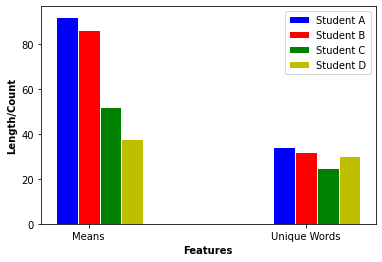

StudentA: 
  Source 1
StudentB: 
  Source 2
StudentC: 
  Copied 1
StudentD: 
  Copied 2


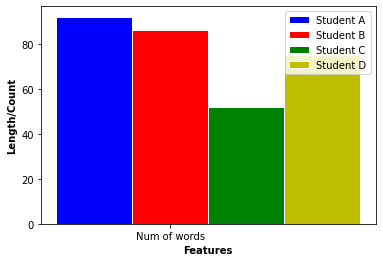

StudentA: 
  Source 1
StudentB: 
  Source 2
StudentC: 
  Copied 1
StudentD: 
  Copied 2


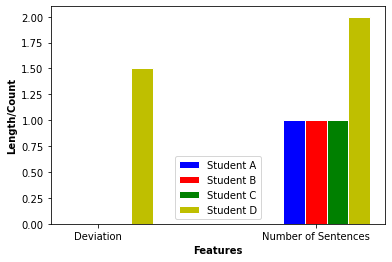

StudentA: 
  Source 1
StudentB: 
  Source 2
StudentC: 
  Copied 1
StudentD: 
  Copied 2


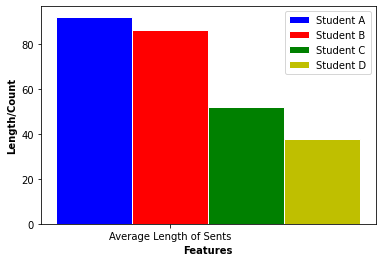

StudentA: 
  Source 1
StudentB: 
  Source 2
StudentC: 
  Copied 1
StudentD: 
  Copied 2


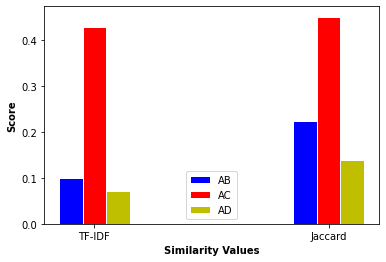

StudentA: 
  Source 1
StudentB: 
  Source 2
StudentC: 
  Copied 1
StudentD: 
  Copied 2


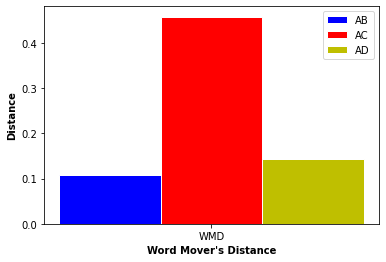

StudentA: 
  Source 1
StudentB: 
  Source 2
StudentC: 
  Copied 1
StudentD: 
  Copied 2


,Name,POS Trigrams,Function Words,Punctuation Frequency,Key words
0,Source 1,"[(DT, NN, IN), (NN, IN, NNS), (IN, NNS, IN), (RB, IN, NN)]","{'of': 4, 'with': 4, 'the': 3, 'in': 3, 'which': 2}","{',': 3, ':': 1, ';': 1, '.': 1}","[previous martial, relations urging, constantly]"
1,Source 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, JJ, NNS)]","{'of': 9, 'the': 6, 'a': 3, 'and': 2, 'for': 2}","{',': 6, ';': 1, '.': 1}","[creatures, republican, marine, farmer, residence]"
2,Copied 1,"[(JJ, NN, IN), (NN, IN, DT), (RB, CD, NNS), (CD, NNS, RB)]","{'all': 2, 'and': 2, 'on': 1, 'by': 1, 'to': 1}","{',': 4, '.': 1}","[starvation martial, conditions including, friendly]"
3,Copied 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, DT, NN)]","{'of': 7, 'the': 5, 'a': 3, 'and': 2, 'for': 2}","{',': 5, '.': 2, ';': 1}","[sea, republican, creatures, innumerable, written]"


,Student A to Student X,Final Result,Total Score,Common POS Trigrams,Standard Deviation Difference,Mean Length of Sentences Difference,Unique Words Difference,Common Function Words,Common Punctuation,Average Sentence Length Difference,Number of Sentences Difference,Number of Words Difference,Suspicious Sentences (Using Jaccard),Topic (True or False)
0,AB,False,1.25,False,[0.0],[6.0],2,0,3,6.0,0,6,{},False
1,AC,True,7.00,False,[0.0],[40.0],9,0,2,40.0,0,40,"{'Only two years later, all these friendly Sioux were suddenly plunged into new conditions, including starvation, martial law on all their reservations, and constant urging by their friends and relations to join in warfare against the treacherous government that had kept faith with neither friend nor foe.': '""In ages which have no record these islands were the home of millions of ""Contrast the condition into which all these friendly Indians are suddenly plunged now, with their condition only two years previous: martial law now in force on all their reservations; themselves in danger of starvation, and constantly exposed to the influence of emissaries from their friends and relations, urging them to join in fighting this treacherous government that had kept faith with nobody--neither with friend nor with foe.""'}",True
2,AD,False,2.25,False,[-1.5],[54.5],4,0,3,54.5,-1,17,{},False


,Names 1,Names 2
0,Copied 10,Source 1


 
 
 
NEW ITERATION SELECTING  Copied 1  AS STUDENT A 
 ------------------ 

Delta score for candidate 0 is 1.175932312802466 
 
 
 

Delta score for candidate 1 is 0.0 
 
 
 

Delta score for candidate 2 is 1.6988583693586987 
 
 
 

Delta score for candidate 3 is 1.4422239856537378 
 
 
 

{'Copied 10': 'Source 1', 'Source 11': 'Copied 1'}


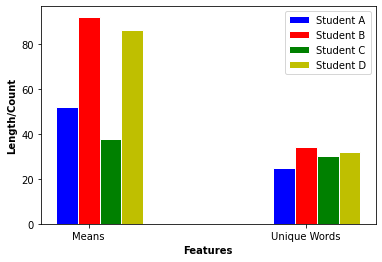

StudentA: 
  Copied 1
StudentB: 
  Source 1
StudentC: 
  Copied 2
StudentD: 
  Source 2


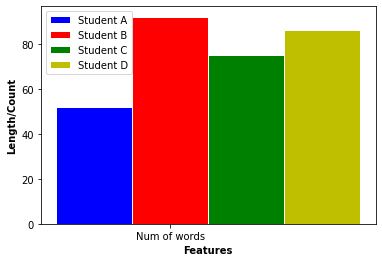

StudentA: 
  Copied 1
StudentB: 
  Source 1
StudentC: 
  Copied 2
StudentD: 
  Source 2


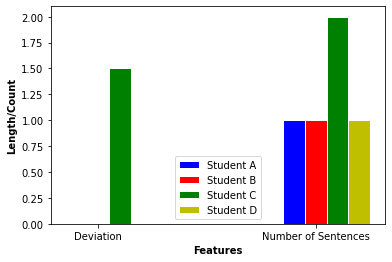

StudentA: 
  Copied 1
StudentB: 
  Source 1
StudentC: 
  Copied 2
StudentD: 
  Source 2


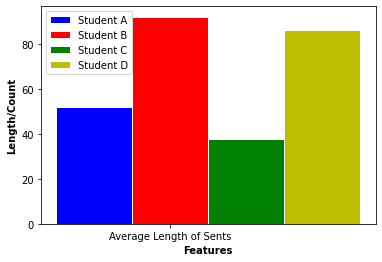

StudentA: 
  Copied 1
StudentB: 
  Source 1
StudentC: 
  Copied 2
StudentD: 
  Source 2


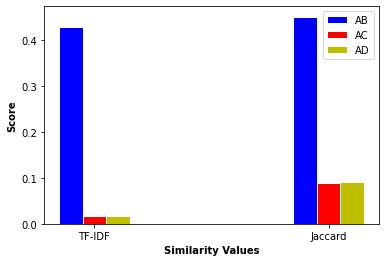

StudentA: 
  Copied 1
StudentB: 
  Source 1
StudentC: 
  Copied 2
StudentD: 
  Source 2


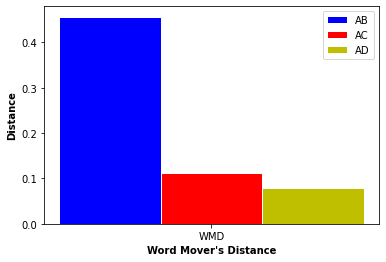

StudentA: 
  Copied 1
StudentB: 
  Source 1
StudentC: 
  Copied 2
StudentD: 
  Source 2


,Name,POS Trigrams,Function Words,Punctuation Frequency,Key words
0,Copied 1,"[(JJ, NN, IN), (NN, IN, DT), (RB, CD, NNS), (CD, NNS, RB)]","{'all': 2, 'and': 2, 'on': 1, 'by': 1, 'to': 1}","{',': 4, '.': 1}","[starvation martial, conditions including, plunged]"
1,Source 1,"[(DT, NN, IN), (NN, IN, NNS), (IN, NNS, IN), (RB, IN, NN)]","{'of': 4, 'with': 4, 'the': 3, 'in': 3, 'which': 2}","{',': 3, ':': 1, ';': 1, '.': 1}","[previous martial, treacherous government, relations]"
2,Copied 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, DT, NN)]","{'of': 7, 'the': 5, 'a': 3, 'and': 2, 'for': 2}","{',': 5, '.': 2, ';': 1}","[sea, republican, creatures, innumerable, birds]"
3,Source 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, JJ, NNS)]","{'of': 9, 'the': 6, 'a': 3, 'and': 2, 'for': 2}","{',': 6, ';': 1, '.': 1}","[republican, creatures, marine, residence, birds]"


,Student A to Student X,Final Result,Total Score,Common POS Trigrams,Standard Deviation Difference,Mean Length of Sentences Difference,Unique Words Difference,Common Function Words,Common Punctuation,Average Sentence Length Difference,Number of Sentences Difference,Number of Words Difference,Suspicious Sentences (Using Jaccard),Topic (True or False)
0,AB,True,6.0,False,[0.0],[-40.0],-9,0,2,-40.0,0,-40,"{'""In ages which have no record these islands were the home of millions of ""Contrast the condition into which all these friendly Indians are suddenly plunged now, with their condition only two years previous: martial law now in force on all their reservations; themselves in danger of starvation, and constantly exposed to the influence of emissaries from their friends and relations, urging them to join in fighting this treacherous government that had kept faith with nobody--neither with friend nor with foe.""': 'Only two years later, all these friendly Sioux were suddenly plunged into new conditions, including starvation, martial law on all their reservations, and constant urging by their friends and relations to join in warfare against the treacherous government that had kept faith with neither friend nor foe.'}",True
1,AC,False,2.0,False,[-1.5],[14.5],-5,0,2,14.5,-1,-23,{},False
2,AD,False,3.0,False,[0.0],[-34.0],-7,0,2,-34.0,0,-34,{},False


,Names 1,Names 2
0,Copied 10,Source 1
1,Source 11,Copied 1


 
 
 
NEW ITERATION SELECTING  Source 2  AS STUDENT A 
 ------------------ 

Delta score for candidate 0 is 0.9996803026067657 
 
 
 

Delta score for candidate 1 is 1.6988583693586987 
 
 
 

Delta score for candidate 2 is 0.0 
 
 
 

Delta score for candidate 3 is 0.47180630986205824 
 
 
 

{'Copied 10': 'Source 1', 'Copied 22': 'Source 2', 'Source 11': 'Copied 1'}


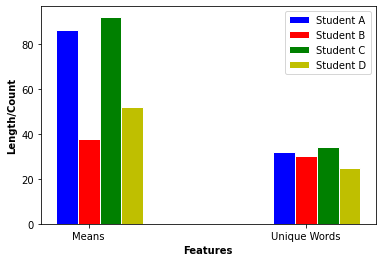

StudentA: 
  Source 2
StudentB: 
  Copied 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


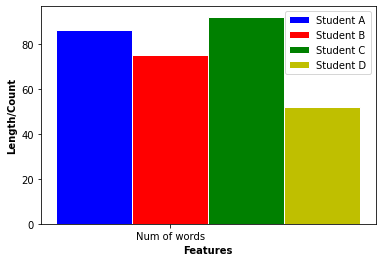

StudentA: 
  Source 2
StudentB: 
  Copied 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


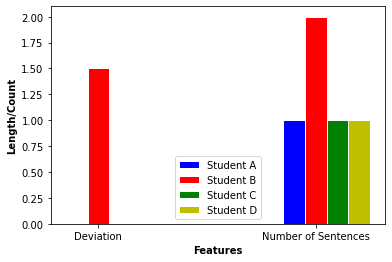

StudentA: 
  Source 2
StudentB: 
  Copied 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


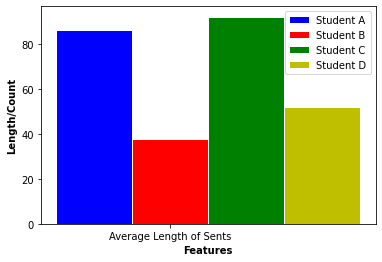

StudentA: 
  Source 2
StudentB: 
  Copied 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


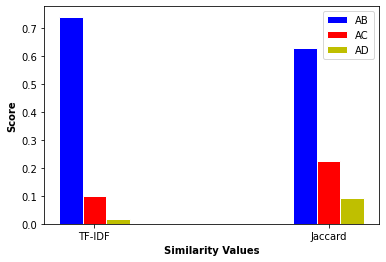

StudentA: 
  Source 2
StudentB: 
  Copied 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


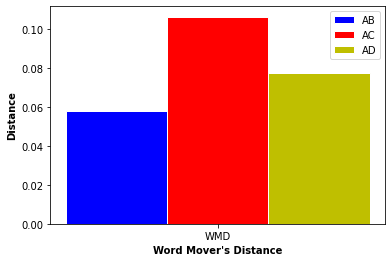

StudentA: 
  Source 2
StudentB: 
  Copied 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


,Name,POS Trigrams,Function Words,Punctuation Frequency,Key words
0,Source 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, JJ, NNS)]","{'of': 9, 'the': 6, 'a': 3, 'and': 2, 'for': 2}","{',': 6, ';': 1, '.': 1}","[republican, creatures, happy, birds, sea]"
1,Copied 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, DT, NN)]","{'of': 7, 'the': 5, 'a': 3, 'and': 2, 'for': 2}","{',': 5, '.': 2, ';': 1}","[republican, sea, innumerable, creatures, happy]"
2,Source 1,"[(DT, NN, IN), (NN, IN, NNS), (IN, NNS, IN), (RB, IN, NN)]","{'of': 4, 'with': 4, 'the': 3, 'in': 3, 'which': 2}","{',': 3, ':': 1, ';': 1, '.': 1}","[previous martial, suddenly plunged, friendly]"
3,Copied 1,"[(JJ, NN, IN), (NN, IN, DT), (RB, CD, NNS), (CD, NNS, RB)]","{'all': 2, 'and': 2, 'on': 1, 'by': 1, 'to': 1}","{',': 4, '.': 1}","[conditions including, starvation martial, constant]"


,Student A to Student X,Final Result,Total Score,Common POS Trigrams,Standard Deviation Difference,Mean Length of Sentences Difference,Unique Words Difference,Common Function Words,Common Punctuation,Average Sentence Length Difference,Number of Sentences Difference,Number of Words Difference,Suspicious Sentences (Using Jaccard),Topic (True or False)
0,AB,True,9.75,True,[-1.5],[48.5],2,5,3,48.5,-1,11,"{'Here lived innumerable creatures predestined from the creation of the world to lay up a store of wealth for the British farmer, and a store of quite another sort for an immaculate Republican government.': '""In ages which have no record these islands were the home of millions of happy birds, the resort of a hundred times more millions of fishes, of sea lions, and other creatures whose names are not so common; the marine residence, in fact, of innumerable creatures predestined from the creation of the world to lay up a store of wealth for the British farmer, and a store of quite another sort for an immaculate Republican government.""'}",True
1,AC,False,2.25,False,[0.0],[-6.0],-2,0,3,-6.0,0,-6,{},False
2,AD,False,3.00,False,[0.0],[34.0],7,0,2,34.0,0,34,{},False


,Names 1,Names 2
0,Copied 10,Source 1
1,Source 11,Copied 1
2,Copied 22,Source 2


 
 
 
NEW ITERATION SELECTING  Copied 2  AS STUDENT A 
 ------------------ 

Delta score for candidate 0 is 1.3645957091847343 
 
 
 

Delta score for candidate 1 is 1.4422239856537378 
 
 
 

Delta score for candidate 2 is 0.47180630986205824 
 
 
 

Delta score for candidate 3 is 0.0 
 
 
 

{'Copied 10': 'Source 1',
 'Copied 22': 'Source 2',
 'Source 11': 'Copied 1',
 'Source 23': 'Copied 2'}


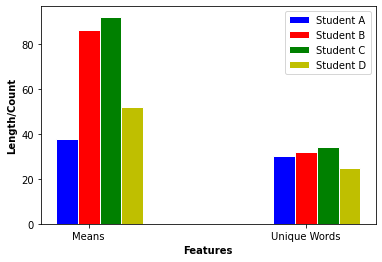

StudentA: 
  Copied 2
StudentB: 
  Source 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


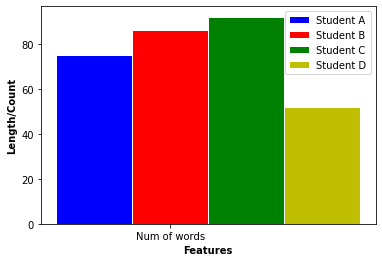

StudentA: 
  Copied 2
StudentB: 
  Source 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


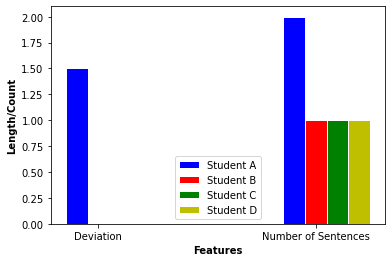

StudentA: 
  Copied 2
StudentB: 
  Source 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


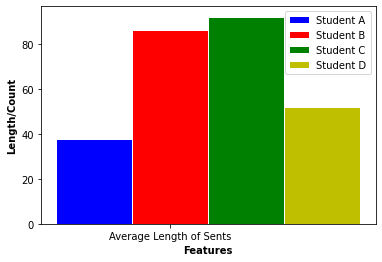

StudentA: 
  Copied 2
StudentB: 
  Source 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


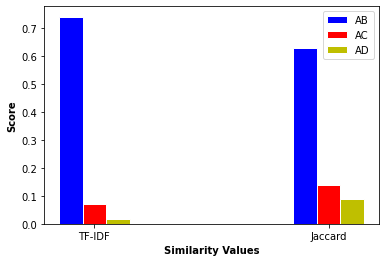

StudentA: 
  Copied 2
StudentB: 
  Source 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


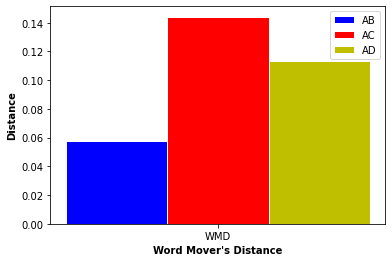

StudentA: 
  Copied 2
StudentB: 
  Source 2
StudentC: 
  Source 1
StudentD: 
  Copied 1


,Name,POS Trigrams,Function Words,Punctuation Frequency,Key words
0,Copied 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, DT, NN)]","{'of': 7, 'the': 5, 'a': 3, 'and': 2, 'for': 2}","{',': 5, '.': 2, ';': 1}","[sea, republican, innumerable, creatures, long]"
1,Source 2,"[(DT, NN, IN), (NN, IN, DT), (IN, DT, JJ), (IN, JJ, NNS)]","{'of': 9, 'the': 6, 'a': 3, 'and': 2, 'for': 2}","{',': 6, ';': 1, '.': 1}","[republican, creatures, happy, birds, residence]"
2,Source 1,"[(DT, NN, IN), (NN, IN, NNS), (IN, NNS, IN), (RB, IN, NN)]","{'of': 4, 'with': 4, 'the': 3, 'in': 3, 'which': 2}","{',': 3, ':': 1, ';': 1, '.': 1}","[previous martial, suddenly plunged, constantly]"
3,Copied 1,"[(JJ, NN, IN), (NN, IN, DT), (RB, CD, NNS), (CD, NNS, RB)]","{'all': 2, 'and': 2, 'on': 1, 'by': 1, 'to': 1}","{',': 4, '.': 1}","[starvation martial, conditions including, urging]"


,Student A to Student X,Final Result,Total Score,Common POS Trigrams,Standard Deviation Difference,Mean Length of Sentences Difference,Unique Words Difference,Common Function Words,Common Punctuation,Average Sentence Length Difference,Number of Sentences Difference,Number of Words Difference,Suspicious Sentences (Using Jaccard),Topic (True or False)
0,AB,True,8.75,True,[1.5],[-48.5],-2,5,3,-48.5,1,-11,"{'""In ages which have no record these islands were the home of millions of happy birds, the resort of a hundred times more millions of fishes, of sea lions, and other creatures whose names are not so common; the marine residence, in fact, of innumerable creatures predestined from the creation of the world to lay up a store of wealth for the British farmer, and a store of quite another sort for an immaculate Republican government.""': 'Here lived innumerable creatures predestined from the creation of the world to lay up a store of wealth for the British farmer, and a store of quite another sort for an immaculate Republican government.'}",True
1,AC,False,2.25,False,[1.5],[-54.5],-4,0,3,-54.5,1,-17,{},False
2,AD,False,2.00,False,[1.5],[-14.5],5,0,2,-14.5,1,23,{},False


,Names 1,Names 2
0,Copied 10,Source 1
1,Source 11,Copied 1
2,Copied 22,Source 2
3,Source 23,Copied 2


In [ ]:
Name_tags = 0
Accused = {}
global sentJaccard_dict
global Total_sents

for every_student in Names:
  print("NEW ITERATION SELECTING ", every_student, " AS STUDENT A \n ------------------ \n", )
  Test = []

  Test_docNum = Names.index(every_student)
  Test.append(Data[Test_docNum])


  Suspects_Student_X = {}

  for docs in range(len(Data)):
      tokens = nltk.word_tokenize(Data[docs])

      # Filter out punctuation
      Doc_tokens[docs] = ([token for token in tokens
                                              if any(c.isalpha() for c in token)])

      # Get a distribution of token lengths
      token_lengths = [len(token) for token in Doc_tokens[docs]]



  for docs in range(len(Data)):
      Doc_tokens[docs] = (
          [tok.lower() for tok in Doc_tokens[docs]])

  # Combine every paper except our test case into a single corpus
  whole_corpus = []
  for docs in range(len(Data)):
      whole_corpus += Doc_tokens[docs]

  # Get a frequency distribution
  whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
  whole_corpus_freq_dist[ :10 ]

  features = [word for word,freq in whole_corpus_freq_dist]
  feature_freqs = {}

  for docs in range(len(Data)):
      # A dictionary for each candidate's features
      feature_freqs[docs] = {}

      # A helper value containing the number of tokens in the author's subcorpus
      overall = len(Doc_tokens[docs])

      # Calculate each feature's presence in the subcorpus
      for feature in features:
          presence = Doc_tokens[docs].count(feature)
          feature_freqs[docs][feature] = presence / overall


  # The data structure into which we will be storing the "corpus standard" statistics
  corpus_features = {}

  # For each feature...
  for feature in features:
      # Create a sub-dictionary that will contain the feature's mean
      # and standard deviation
      corpus_features[feature] = {}

      # Calculate the mean of the frequencies expressed in the subcorpora
      feature_average = 0
      for docs in range(len(Data)):
          feature_average += feature_freqs[docs][feature]
      feature_average /= len(Data)
      corpus_features[feature]["Mean"] = feature_average

      # Calculate the standard deviation using the basic formula for a sample
      feature_stdev = 0
      for docs in range(len(Data)):
          diff = feature_freqs[docs][feature] - corpus_features[feature]["Mean"]
          feature_stdev += diff*diff
      feature_stdev /= (len(Data) - 1)
      feature_stdev = math.sqrt(feature_stdev)
      corpus_features[feature]["StdDev"] = feature_stdev



  feature_zscores = {}
  for docs in range(len(Data)):
      feature_zscores[docs] = {}
      for feature in features:

          # Z-score definition = (value - mean) / stddev
          # We use intermediate variables to make the code easier to read
          feature_val = feature_freqs[docs][feature]
          feature_mean = corpus_features[feature]["Mean"]
          feature_stdev = corpus_features[feature]["StdDev"]
          feature_zscores[docs][feature] = ((feature_val-feature_mean) /
                                              feature_stdev)
          

  # Tokenize the test case
  testcase_tokens = nltk.word_tokenize(Test[0])

  # Filter out punctuation and lowercase the tokens
  testcase_tokens = [token.lower() for token in testcase_tokens
                    if any(c.isalpha() for c in token)]


  # Calculate the test case's features
  overall = len(testcase_tokens)
  testcase_freqs = {}
  for feature in features:
      presence = testcase_tokens.count(feature)
      testcase_freqs[feature] = presence / overall

  # Calculate the test case's feature z-scores
  testcase_zscores = {}
  for feature in features:
      feature_val = testcase_freqs[feature]
      feature_mean = corpus_features[feature]["Mean"]
      feature_stdev = corpus_features[feature]["StdDev"]
      testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    #  print("Test case z-score for feature", feature, "is", testcase_zscores[feature])


  for docs in range(len(Data)):
      delta = 0
      for feature in features:
          delta += math.fabs((testcase_zscores[feature] -
                              feature_zscores[docs][feature]))
    
      delta /= len(features)
      print( "Delta score for candidate", docs, "is", delta, "\n \n \n \n")

      
      Suspects_Student_X[docs] = delta








  Top_Data = []
  Feature_Data = []
  Dict_names = {}
  Names_with_documents = {}
  Name_list = []
  Students = 5

  suspects_list = nsmallest(Students, Suspects_Student_X, key = Suspects_Student_X.get) 

  for docID in suspects_list:
    Dict_names[Names[docID]] = docID

  for name, ID in Dict_names.items():
    Names_with_documents[name] = [Data[ID]]

  for suspects in suspects_list:
    Top_Data.append(preprocess(LDA_Data[suspects]))
    Feature_Data.append(Data[suspects])


  Name_list = list(Names_with_documents.keys())

  #pprint(Names_with_documents)






  #print(Top_Data)
  dictionary_LDA = corpora.Dictionary(Top_Data)
  dictionary_LDA.filter_extremes(no_below=0)
  corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in Top_Data]
  BoW = dictionary_LDA.doc2bow(LDA_Data[0])

  num_topics = 5
  lda_model = models.LdaModel(corpus, id2word=dictionary_LDA, num_topics=num_topics)
  #x = lda_model.print_topics()
  #x = lda_model.get_document_topics(BoW, per_word_topics=True)
  #print(x)
  #pprint(lda_model.print_topics())

  for idx, topic in lda_model.print_topics(-1):
   #   print("Topic: {} \nWords: {}".format(idx, topic ))
    #  print("\n")
      x = None


  

  def format_topics_sentences(ldamodel=None, corpus=corpus, texts=Data):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row_list in enumerate(ldamodel[corpus]):
          row = row_list[0] if ldamodel.per_word_topics else row_list            
          # print(row)
          row = sorted(row, key=lambda x: (x[1]), reverse=True)
          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0:  # => dominant topic
                  wp = ldamodel.show_topic(topic_num)
                  topic_keywords = ", ".join([word for word, prop in wp])
                  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                  break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)






  df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=Feature_Data)

  # Format
  for each_doc in LDA_Data:
   # print(str(each_doc), "\n")
    x = None

  df_dominant_topic = df_topic_sents_keywords.reset_index()
  df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  #df_dominant_topic.head(10)




  Complete_list_A = []
  Complete_list_B = []
  Complete_list_C = []
  Complete_list_D = []
  Complete_list_E = []

  Complete_listWithNames = {}



  index = 0

  for i in range(len(Feature_Data)):
    Feature_Data[i]
    length_of_sentences = []
    Mean = []
    Standard_deviation = []
    List = []
    Differences = []
    Name

    if index == 0:
      Complete_list_A.append(POS_Freq(i))

    if index == 1:
      Complete_list_B.append(POS_Freq(i))

    if index == 2:
      Complete_list_C.append(POS_Freq(i))

    if index == 3:
      Complete_list_D.append(POS_Freq(i))

    if index == 4:
      Complete_list_E.append(POS_Freq(i))




    if index == 0:
      Deviation, Mean = Standard_Deviation_Of_Sents(i)
      Complete_list_A.append(Deviation)
      Complete_list_A.append(Mean)

      
    if index == 1:
      Deviation, Mean = Standard_Deviation_Of_Sents(i)
      Complete_list_B.append(Deviation)
      Complete_list_B.append(Mean)

    if index == 2:
      Deviation, Mean = Standard_Deviation_Of_Sents(i)
      Complete_list_C.append(Deviation)
      Complete_list_C.append(Mean)

    if index == 3:
      Deviation, Mean = Standard_Deviation_Of_Sents(i)
      Complete_list_D.append(Deviation)
      Complete_list_D.append(Mean)

    if index == 4:
      Deviation, Mean = Standard_Deviation_Of_Sents(i)
      Complete_list_E.append(Deviation)
      Complete_list_E.append(Mean)



    if index == 0:
      Complete_list_A.append(Vocab_richness(i))

    if index == 1:
      Complete_list_B.append(Vocab_richness(i))

    if index == 2:
      Complete_list_C.append(Vocab_richness(i))

    if index == 3:
      Complete_list_D.append(Vocab_richness(i))

    if index == 4:
      Complete_list_E.append(Vocab_richness(i)) 





    if index == 0:
      Complete_list_A.append(FunctionWord_freq(i))

    if index == 1:
      Complete_list_B.append(FunctionWord_freq(i))

    if index == 2:
      Complete_list_C.append(FunctionWord_freq(i))

    if index == 3:
      Complete_list_D.append(FunctionWord_freq(i))

    if index == 4:
      Complete_list_E.append(FunctionWord_freq(i)) 




    if index == 0:
      Complete_list_A.append(Punctuation_Freq(i))

    if index == 1:
      Complete_list_B.append(Punctuation_Freq(i))

    if index == 2:
      Complete_list_C.append(Punctuation_Freq(i))

    if index == 3:
      Complete_list_D.append(Punctuation_Freq(i))

    if index == 4:
      Complete_list_E.append(Punctuation_Freq(i)) 




    if index == 0:
      Complete_list_A.append(AverageSentLength(i))

    if index == 1:
      Complete_list_B.append(AverageSentLength(i))

    if index == 2:
      Complete_list_C.append(AverageSentLength(i))

    if index == 3:
      Complete_list_D.append(AverageSentLength(i))

    if index == 4:
      Complete_list_E.append(AverageSentLength(i)) 



    if index == 0:
      Complete_list_A.append(NumberOfSents(i))

    if index == 1:
      Complete_list_B.append(NumberOfSents(i))

    if index == 2:
      Complete_list_C.append(NumberOfSents(i))

    if index == 3:
      Complete_list_D.append(NumberOfSents(i))

    if index == 4:
      Complete_list_E.append(NumberOfSents(i)) 


    

    if index == 0:
      Complete_list_A.append(NumberOfWords(i))

    if index == 1:
      Complete_list_B.append(NumberOfWords(i))

    if index == 2:
      Complete_list_C.append(NumberOfWords(i))

    if index == 3:
      Complete_list_D.append(NumberOfWords(i))

    if index == 4:
      Complete_list_E.append(NumberOfWords(i)) 

    
      
    index = index + 1
    







  Dominant_topics = []

  index = 0

  for i in range(len(Feature_Data)):
    Dominant_topics.append(df_dominant_topic.at[i, "Dominant_Topic"])

  for topics in Dominant_topics:

    if index == 0:
      Complete_list_A.append(topics)

    if index == 1:
      Complete_list_B.append(topics)

    if index == 2:
      Complete_list_C.append(topics)

    if index == 3:
      Complete_list_D.append(topics)

    if index == 4:
      Complete_list_E.append(topics)  
    
    index = index + 1


    





  #print(Complete_list_A)
  #print(Complete_list_B)
  #print(Complete_list_C)
  #print(Complete_list_D)
  #print(Complete_list_E)


  Complete_listWithNames[Names[suspects_list[0]]] = Complete_list_A
  Complete_listWithNames[Names[suspects_list[1]]] = Complete_list_B
  if len(Feature_Data) >= 3:
    Complete_listWithNames[Names[suspects_list[2]]] = Complete_list_C
  if len(Feature_Data) == 4:
    Complete_listWithNames[Names[suspects_list[3]]] = Complete_list_D
  if len(Feature_Data) == 5:
    Complete_listWithNames[Names[suspects_list[4]]] = Complete_list_E

  #print("\n \n", Complete_listWithNames, "\n")
  sentJaccard_dict = {}
  Total_sents = []
  AB_comparisons()
  if len(Feature_Data) >= 3:
    sentJaccard_dict = {}
    Total_sents = []
    AC_comparisons()
  if len(Feature_Data) >= 4:
    sentJaccard_dict = {}
    Total_sents = []
    AD_comparisons()
  if len(Feature_Data) >= 5:
      sentJaccard_dict = {}
      Total_sents = []
      AE_comparisons()

  pprint(Accused)

  Graph1()
  Graph2()
  Graph3()
  Graph4()
  SimilarityMetricsGraph()
  SimilarityMetricsGraphWMD()

  pd.set_option('display.max_colwidth',1000)

  if len(Feature_Data) == 2:
    df_data = {"Name" : [Name_list[0], Name_list[1]],
    'POS Trigrams': [list(Complete_list_A[0]), list(Complete_list_B[0])],
          'Function Words': [Complete_list_A[4], Complete_list_B[4]],
          'Punctuation Frequency': [Complete_list_A[4], Complete_list_B[4]],
           'Key words' : [DocA_words, DocB_words]}

  if len(Feature_Data) >= 3:
    df_data = {"Name" : [Name_list[0], Name_list[1], Name_list[2]],
    'POS Trigrams': [list(Complete_list_A[0]), list(Complete_list_B[0]), list(Complete_list_C[0])],
          'Function Words': [Complete_list_A[4], Complete_list_B[4], Complete_list_C[4]],
          'Punctuation Frequency': [Complete_list_A[5], Complete_list_B[5], Complete_list_C[5]],
           'Key words' : [DocA_words, DocB_words, DocC_words]}

  if len(Feature_Data) >= 4:
    df_data = {"Name" : [Name_list[0], Name_list[1], Name_list[2], Name_list[3]],
    'POS Trigrams': [list(Complete_list_A[0]), list(Complete_list_B[0]), list(Complete_list_C[0]), list(Complete_list_D[0])],
          'Function Words': [Complete_list_A[4], Complete_list_B[4], Complete_list_C[4], Complete_list_D[4]],
          'Punctuation Frequency': [Complete_list_A[5], Complete_list_B[5], Complete_list_C[5], Complete_list_D[5]],
           'Key words' : [DocA_words, DocB_words, DocC_words, DocD_words]}

  if len(Feature_Data) == 5:
    df_data = {"Name" : [Name_list[0], Name_list[1], Name_list[2], Name_list[3], Name_list[4]],
    'POS Trigrams': [list(Complete_list_A[0]), list(Complete_list_B[0]), list(Complete_list_C[0]), list(Complete_list_D[0]), list(Complete_list_E[0])],
          'Function Words': [Complete_list_A[4], Complete_list_B[4], Complete_list_C[4], Complete_list_D[4], Complete_list_E[4]],
          'Punctuation Frequency': [Complete_list_A[5], Complete_list_B[5], Complete_list_C[5], Complete_list_D[5], Complete_list_E[5]],
           'Key words' : [DocA_words, DocB_words, DocC_words, DocD_words, DocE_words]}





  if len(Feature_Data) == 2:
    lst = [['AB', AB_final, AB_count, AB_list[0], AB_list[1], AB_list[2], AB_list[3], AB_list[4], AB_list[5], AB_list[6], AB_list[7], 
            AB_list[8], AB_list[11], AB_list[-1]]]
          
        
    Difference_df = pd.DataFrame(lst, columns =['Student A to Student X', 'Final Result', 'Total Score',
                                    'Common POS Trigrams ', 
                                    'Standard Deviation Difference ', 
                                    'Mean Length of Sentences Difference',
                                    'Unique Words Difference ',
                                    'Common Function Words ',
                                    'Common Punctuation', 
                                    'Average Sentence Length Difference ',                  
                                    'Number of Sentences Difference ',
                                    'Number of Words Difference ',
                                    'Suspicious Sentences (Using Jaccard)',
                                    'Topic (True or False)'
                                    ])
  

  if len(Feature_Data) == 3:
    lst = [['AB', AB_final, AB_count, AB_list[0], AB_list[1], AB_list[2], AB_list[3], AB_list[4], AB_list[5], AB_list[6], AB_list[7], 
            AB_list[8], AB_list[11], AB_list[-1]],
           
           ['AC', AC_final, AC_count, AC_list[0], AC_list[1], AC_list[2], AC_list[3], AC_list[4], AC_list[5], AC_list[6], AC_list[7], 
            AC_list[8], AC_list[11], AC_list[-1]]]

          
        
    Difference_df = pd.DataFrame(lst, columns =['Student A to Student X', 'Final Result', 'Total Score',
                                    'Common POS Trigrams ', 
                                    'Standard Deviation Difference ', 
                                    'Mean Length of Sentences Difference',
                                    'Unique Words Difference ',
                                    'Common Function Words ',
                                    'Common Punctuation', 
                                    'Average Sentence Length Difference ',                  
                                    'Number of Sentences Difference ',
                                    'Number of Words Difference ',
                                    'Suspicious Sentences (Using Jaccard)',
                                    'Topic (True or False)'
                                    ])



  if len(Feature_Data) == 4:
    lst = [['AB', AB_final, AB_count, AB_list[0], AB_list[1], AB_list[2], AB_list[3], AB_list[4], AB_list[5], AB_list[6], AB_list[7], 
            AB_list[8], AB_list[11], AB_list[-1]], 
          
          ['AC', AC_final, AC_count, AC_list[0], AC_list[1], AC_list[2], AC_list[3], AC_list[4], AC_list[5], AC_list[6], AC_list[7], 
            AC_list[8],AC_list[11], AC_list[-1]],
          
          ['AD', AD_final, AD_count, AD_list[0], AD_list[1], AD_list[2], AD_list[3], AD_list[4], AD_list[5], AD_list[6], AD_list[7], 
            AD_list[8], AD_list[11], AD_list[-1]]]
          
        
    Difference_df = pd.DataFrame(lst, columns =['Student A to Student X', 'Final Result', 'Total Score ',
                                    'Common POS Trigrams ', 
                                    'Standard Deviation Difference ', 
                                    'Mean Length of Sentences Difference',
                                    'Unique Words Difference ',
                                    'Common Function Words ',
                                    'Common Punctuation', 
                                    'Average Sentence Length Difference ',                  
                                    'Number of Sentences Difference ',
                                    'Number of Words Difference ',
                                    'Suspicious Sentences (Using Jaccard)',
                                    'Topic (True or False)'
                                    ])



  if len(Feature_Data) == 5:
    lst = [['AB', AB_final, AB_count, AB_list[0], AB_list[1], AB_list[2], AB_list[3], AB_list[4], AB_list[5], AB_list[6], AB_list[7], 
            AB_list[8], AB_list[11], AB_list[-1]], 
          
          ['AC', AC_final, AC_count, AC_list[0], AC_list[1], AC_list[2], AC_list[3], AC_list[4], AC_list[5], AC_list[6], AC_list[7], 
            AC_list[8],AC_list[11], AC_list[-1]],
          
          ['AD', AD_final, AD_count, AD_list[0], AD_list[1], AD_list[2], AD_list[3], AD_list[4], AD_list[5], AD_list[6], AD_list[7], 
            AD_list[8], AD_list[11], AD_list[-1]],
          
          ['AE', AE_final, AE_count, AE_list[0], AE_list[1], AE_list[2], AE_list[3], AE_list[4], AE_list[5], AE_list[6], AE_list[7], 
            AE_list[8], AE_list[11], AE_list[-1]]]
          
        
    Difference_df = pd.DataFrame(lst, columns =['Student A to Student X', 'Final Result', 'Total Score ',
                                    'Common POS Trigrams ', 
                                    'Standard Deviation Difference ', 
                                    'Mean Length of Sentences Difference',
                                    'Unique Words Difference ',
                                    'Common Function Words ',
                                    'Common Punctuation', 
                                    'Average Sentence Length Difference ',                  
                                    'Number of Sentences Difference ',
                                    'Number of Words Difference ',
                                    'Suspicious Sentences (Using Jaccard)',
                                    'Topic (True or False)'
                                    ])


  display(pd.DataFrame(df_data, columns = ['Name','POS Trigrams','Function Words',
                                           'Punctuation Frequency', 'Key words']))
  display(Difference_df)


  data_accused = {"Names 1" : list(Accused.keys()) , 
                "Names 2" : list(Accused.values())}
  print(" \n \n ")
  display(pd.DataFrame(data_accused, columns = ["Names 1", "Names 2"]))
  print(" \n \n ")

  Name_tags = Name_tags + 1

# Results Down Here